***

<center> <h1> COMP41680 DATA SCIENCE ASSIGNMENT 2 </h1> </center>

***

### Name: Prashant Uttam Wakchaure 
### Student No.: 20200126

***

<center><h2> <font color='green'> Installations </font> </h2> </center>

In [1]:
! pip install -r requirements.txt

<center><h2> <font color='green'> Imports </font> </h2> </center>

In [2]:
import pandas as pd
from pandas import json_normalize
import collections
import csv
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import display
import itertools
from bs4 import BeautifulSoup
import requests
%matplotlib inline

In [3]:
import texthero as hero
import re
import string
import contractions
import unicodedata

In [4]:
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import wordnet
from sklearn import linear_model, ensemble
from sklearn.calibration import CalibratedClassifierCV
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

<h4 style="text-align:justify;"><b><font color='red'> <i>
    Please install the required installations if not found by using pip install "required_library". Also, if some graphs are not visible as I used the plotly library, I request you to restart and run all the cells from start.</i>
    </font></b></h4>

***

<a id='data_scraping'></a>

> ## TASK 1. Data Collection:

***

<h3 style="text-align:justify;"><b><font color='red'> 
1.) Select three of the 9 <a href="http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html">news categories</a>: [Books, Business, Film, Life-and-Style,
Music, Politics, Sport, UK-News, US-News]
    </font></b></h3>

<p style="text-align:justify;"><b>
For this Assignment, I chose the <i>MUSIC</i>, <i>SPORT</i>, <i>& POLITICS</i> categories
    </b></p>

<h3 style="text-align:justify;"><b><font color='red'> 
2.) From the <a href="http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html">link</a>, retrieve details regarding all stories corresponding to your
three selected categories, covering all months January to December 2020.
    </font></b></h3>

<p style="text-align:justify;">
<b>Request you to not run the below code!
Since it took time to collect the data into .csv and the below code does the same. I have provided the final.csv file and it is thus loaded ahead and used for further data analysis. </b></p>

```python
cats = []
titles = []
snippets = []
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i,z in itertools.product(months,range(1,32)):
    try:
        print(i,z)
        html_text = requests.get('http://mlg.ucd.ie/modules/COMP41680/assignment2/month-'+i+'-'+str(z).zfill(3)+'.html', timeout=30)
        if(html_text.ok):
            soup = BeautifulSoup(html_text.content.decode('utf-8','ignore'), 'lxml')
            jan_news = soup.find_all('div', class_='article')
            for jan in jan_news:
                cat = jan.findChildren('p', class_="metadata")
                tit = jan.findChildren('h5')
                snip = jan.findChildren('p', class_="snippet")
                for categ in cat:
                    categ = categ.text
                    for t in tit:
                        for s in snip:
                            if 'Category: Music'  in categ:
                                categories = categ.replace('Category: ',"")
                                t1 = t.text
                                t1 = t1.lstrip('0123456789.- ')
                                s1 = s.text
                                cats.append(categories)
                                titles.append(t1)
                                snippets.append(s1)
                            if 'Category: Politics'  in categ:
                                categories = categ.replace('Category: ',"")
                                t1 = t.text
                                t1 = t1.lstrip('0123456789.- ')
                                s1 = s.text
                                cats.append(categories)
                                titles.append(t1)
                                snippets.append(s1)
                            if 'Category: Sport'  in categ:
                                categories = categ.replace('Category: ',"")
                                t1 = t.text
                                t1 = t1.lstrip('0123456789.- ')
                                s1 = s.text
                                cats.append(categories)
                                titles.append(t1)
                                snippets.append(s1)
        else:
            print("Not found!")
        
    except(requests.exceptions.HTTPError):
        print('HTTPError')
    except(ValueError):
        print('Decoding JSON has failed')
    except(requests.exceptions.Timeout):
        print('Timeout')
    except(requests.exceptions.TooManyRedirects):
        print('TooManyRedirects')
    except(requests.exceptions.RequestException):
        print('RequestException')
    except(requests.exceptions.ConnectionError):
        print('build http connection failed')      
 ```

<h3 style="text-align:justify;"><b><font color='red'> 
3.) Store the parsed data that you have collected in an appropriate format.
    </font></b></h3>

<p style="text-align:justify;">
<b>After getting the categories, titles and snippets in 3 lists, we append these lists into a dataframe and further save it appropriately as a csv file for further processing and analysis. </b></p>

```python
final_scores = pd.DataFrame()
final_scores['Categories'] = cats
final_scores['Title'] = titles
final_scores['Snippet'] = snippets
final_scores.to_csv('final.csv', encoding='utf-8-sig', index=False)
```

<p style="text-align:justify;">
<b>The "final.csv" dataset is submitted along with this notebook, and is used as a dataframe for further text analysis and evaluations. </b></p>

<center><h2> <font color='green'> Loading Data into Dataframe</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
1.) Load the data from Task 1 and create a set of documents, one per news story. Each document should consist of the concatenation of the story’s title and text snippet. Each document should also have a class label, based on the story’s news category.
    </font></b></h3>

<p style="text-align:justify;"><b>
Firstly, we will load the "final.csv" file using a dataframe and further concatenate the <i>Title</i> and <i>Snippet</i> columns from the dataframe and create a new column <i>"news"</i>.
    </b></p>

In [5]:
pd.options.display.max_columns = None #display all the columns into the output cell.
pd.options.display.max_rows = None #display all the rows into the output cell.

df = pd.read_csv("final.csv")

In [6]:
df.isnull().sum()

Categories    0
Title         0
Snippet       0
dtype: int64

In [7]:
df.loc[:, ('news')] = df[['Title', 'Snippet']].apply(lambda x: ' '.join(x), axis=1)
df.drop(['Title','Snippet'], axis=1, inplace=True)
df.rename(columns={'Categories': 'label'}, inplace=True)
df = df[['news', 'label']] 

In [8]:
print("There are {} rows in the dataset".format(df.shape[0]))
print("There are {} columns in the dataset".format(df.shape[1]))

There are 5424 rows in the dataset
There are 2 columns in the dataset


In [9]:
df.head()

news     label
0   Mariah Carey's Twitter account hacked on New ...     Music
1   Twenty athletes set to light up the Tokyo 202...     Sport
2   Clive Lewis calls for unity among Labour lead...  Politics
3   Michael van Gerwen 3-7 Peter Wright: PDC worl...     Sport
4   Woodford folk festival review – a much-needed...     Music

In [10]:
df.label.value_counts()

Sport       1819
Politics    1808
Music       1797
Name: label, dtype: int64

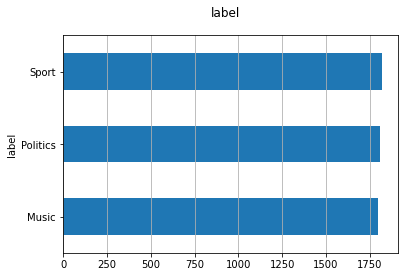

In [11]:
fig, ax = plt.subplots()
fig.suptitle("label", fontsize=12)
df["label"].reset_index().groupby("label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> After loading the dataset with the 3 categories: Music, Sport, Politics; one thing which we can evidently confirm is that the classes of the dataset are somewhat completely balanced. </b></p></li>
    <li><p style="text-align:justify;"><b> Sport has 1819 news articles, Politics has 1808 news articles; whereas Music has the least - 1797 news articles. But all are in the same range.</b></p></li>
    <li><p style="text-align:justify;"><b> Later ahead, I have done a comprehensive text preprocessing which involves multiple things which I'll discuss in the next section.</b></p></li>
</ul>

<a id='text_pre_section'></a>
<center><h2> <font color='green'> Text Preprocessing</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
2. For each unique pair of categories (A,B) from the three that you selected:
i) Apply appropriate preprocessing steps to create a numeric representation
of the documents from these two categories, suitable for classification.
ii) Train a classification model using a binary classifier of your choice, which
can distinguish documents in category A from documents in category B.
iii) Test the predictions of the classification model using an appropriate
evaluation strategy. Report and discuss the evaluation results.
    </font></b></h3>

<center><h3> <font color='blue'> Cleaning Dirty Text </font> </h3> </center>

<p style="text-align:justify;"><b>
Before clubbing the categories (labels) into pairs for further evaluations, we will firstly perform some common text preprocessing techniques on the whole dataset. For this, I am going to write a function called "clean_text()", which can be called anytime to clean particular text off. Also, the lemma and stemming function can be switched to True or False as per the requirement given in the arguments as "do_stemming" or "do_lemma".
    </b></p>

In [23]:
# function to remove accented characters
# Ref: https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [24]:
# function to get the stem of words in the text
def get_stem(text):
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [25]:
# function to get the lemma/grammar form of words in the text
def get_lemma(text):
    tags = ['a', 'r', 'n', 'v']
    lemmas = []
    for i in tags:
        lemma = " ".join([WordNetLemmatizer().lemmatize(w, i) for w in nltk.word_tokenize(text)])
        lemmas.append(lemma)
        final_word = min((word for word in lemmas if word), key=len)
    return final_word

In [26]:
# function to remove stopwords 
def remove_stopwords(text):
    tokenizer = ToktokTokenizer()
    stopword_list = nltk.corpus.stopwords.words('english')
    stopwordset = ENGLISH_STOP_WORDS
    stopwordset = stopwordset.union(stopword_list)
    # I later noticed that there is this single letter-word, which is common in 2 classes, so I'm removing the word "u"
    stopwordset = stopwordset.union("u")
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    t = [token for token in tokens if token.lower() not in stopwordset]
    text = ' '.join(t)    
    return text

In [27]:
# Main Text Preprocessing function consisting of each and every text preprocessing, normalization method
def clean_text(text, do_stemming = False, do_lemma = False):
    text = ' '.join( [w for w in text.split() if len(w)>1] ) # remove single letters
    text = text.replace("Summary:", " ") # remove "Summary:" type string from the news
    # As the news is taken just from the description of the api page,
    #there are some majority of missing last words which don't make any sense, so we instead remove them
    text = text[:text.rfind(' ')]
    text = text.replace("’","'") # replace ’ with ', to fix the contractions
    text = contractions.fix(text) # fixing the contractions
    text = text.lower() # Lowercasing the text
    text = re.sub('\[.*?\]', '', text) # removing text from square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removing any extra punctuations
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('[\[\]\(\)!@#$’…–‘’“”…]+', '', text) # remove all the punctuations given in the bracket
    text = re.sub(' +', ' ', text).strip() # remove any extra whitespaces in between the words
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip() # remove any extra whitespaces in between the words
    text = re.sub('\n', '', text) # remove any new lines
    text = remove_accented_chars(text) # remove accented characters
    text = remove_stopwords(text) # remove stopwords
    if do_stemming == True:
        text = get_stem(text) # Stemming
    if do_lemma == True:
        text = get_lemma(text) # Lemmatization
    text = ' '.join( [w for w in text.split() if len(w)>1] ) # remove single letters
    return text

In [28]:
# Defining the function into a lamda function
cleaned_text = lambda x: clean_text(x, do_lemma=True, do_stemming=False)

In [29]:
# Applying the above lamda function to the "news" in the dataset
data_clean = pd.DataFrame(df.news.apply(cleaned_text))

In [30]:
# Creating a copy of the original uncleaned dataset
org_df = df.copy()

In [31]:
# replacing the news column with the cleaned text
df['news'] = data_clean['news']

In [32]:
# Saving the cleaned dataset, just in case for a clearer view of the cleaned text
df.to_csv("cleaned.csv", index=False)

<p style="text-align:justify;"><b>
Now the dataframe df is having cleaned text (news). Checkout any news from the whole dataset in the below cell, you will see no dirty text and clean news for further text classification.
    </b></p>

In [36]:
# Try out any number from 0 to 5423
df.news.loc[4231] 

'gorillaz song machine season strange timez review poignant sound social distance damon albarn jamie hewletts gorillaz project sell ten million album spawn single break america way britpop'

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Rather than performing preprocessing on each unique pair then separately on the whole multi-class dataset, I used the whole dataset and preprocessed it for further pair-specific and multi-class specific text classification and evaluation. In this way I'm saving the lines the code and applying code reproducibility in some or the other way.</b></p></li>
    <li><p style="text-align:justify;"><b> I have performed a comprehensive text-preprocessing on the concatenated title &amp; snippet columns which contributes the whole document, called as the "news".</b></p></li>
     <li><p style="text-align:justify;"><b> This kind of text preprocessing is done taking my dataset into consideration, and what specific changes along with the traditional changes which I need to make.</b></p></li>
    <li><p style="text-align:justify;"><b> For cleaning the text, I created a function which could abstractly do this work by just specifying the text argument into this method.</b></p></li>
     <li><p style="text-align:justify;"><b> Following are the things which I processed/transformed after having considerable observations from the "news" column:</b></p>
        <ul>
            <li><p style="text-align:justify;"><i> Firstly some of the documents(news articles) contained the "Summary:" string at the start of each article, so I removed it instantly.</i></p></li>
            <li><p style="text-align:justify;"><i> As the news is taken just from the description of the api page, there are some majority of missing last words (ending with …) which don't make any sense, so we instead remove them.</i></p></li>
            <li><p style="text-align:justify;"><i> Then we replace the ’ with appropriate ' symbol, for handling contractions in a right way.</i></p></li>
          <li><p style="text-align:justify;"><i> I also handled the phenomenon of text canonicalization, in which I fixed the contractions using the "contractions" library pertaining to things like could've => could have, can't => cannot, and so on.</i></p></li>
            <li><p style="text-align:justify;"><i> Then I lowercased the text, which is normally done in all the text normalizations.</i></p></li>
            <li><p style="text-align:justify;"><i> Then I did some data-specific preprocessing like removing text from square brackets, removing any extra punctuations, remove words containing numbers, remove all the punctuations given in the bracket, remove any extra whitespaces in between the words, remove any new lines.</i></p></li>
            <li><p style="text-align:justify;"><i> Furthermore, if there are any accented characters, I removed them by writing a <a href="https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0">function</a> for it.</i></p></li>
            <li><p style="text-align:justify;"><i> Now, to normalize the texts even further, I setted up 2 conditions along with their respective arguments for doing stemming and lemmatization. I did this because, everyone has different choices accordingly, some want fast processing and some want accurate processing, so one can turn off the other or both and use the right function in accordance to their dataset and task at hand. When it comes to my preference, I tried multiple stemmer and lemmatization techniques using various libraries, but I saw a better performance with lemmatization, so I have turned it to True.</i></p></li>
            <li><p style="text-align:justify;"><i> I lastly removed the single letters, since they were affecting the performance of the text classification.</i></p></li>
        </ul>
     </li>
    <li><p style="text-align:justify;"><b> All these things are done on trial and error basis, and is totally data-specific.</b></p></li>
</ul>

<center><h3> <font color='blue'> Removing high frequency of similar words present in all categories </font> </h3> </center>

Ref: https://www.pyohio.org/2018/schedule/presentation/38/

In [37]:
# We will first groupby the label(category)
df1 = pd.DataFrame(df.groupby('label')['news'].apply(lambda x: ' '.join(x)))
df1.reset_index(inplace=True)

In [38]:
df1.head()

label                                               news
0     Music  mariah careys twitter account hack new year ev...
1  Politics  clive lewis unity labour leadership hopeful la...
2     Sport  athlete set light tokyo olympics dina ashersmi...

In [39]:
# Then we will create a Document-Term Matrix
cv = CountVectorizer(stop_words='english', ngram_range=(1,4))
data_cv = cv.fit_transform(df1.news)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df1.label

In [40]:
# Then we will transpose the above D-T Matrix to obtain something as follows:
data = data_dtm.transpose()
data.head()

label                    Music  Politics  Sport
aa                           2         0      0
aa williams                  2         0      0
aa williams aa               1         0      0
aa williams aa williams      1         0      0
aa williams spend            1         0      0

In [41]:
# Then we will find the top n(1000) words/grams which are available in the particular news category
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(1000)
    top_dict[c]= list(zip(top.index, top.values))

pd.DataFrame(top_dict).head(30)

Music                 Politics              Sport
0       (review, 554)           (johnson, 652)     (england, 411)
1        (music, 442)                (uk, 634)       (sport, 254)
2        (album, 266)             (boris, 602)       (world, 234)
3          (die, 230)     (boris johnson, 562)        (year, 213)
4         (year, 225)            (brexit, 524)       (rugby, 207)
5          (new, 221)            (labour, 472)        (race, 206)
6          (age, 220)               (say, 380)         (say, 205)
7      (die age, 170)        (government, 345)         (win, 187)
8          (pop, 158)       (coronavirus, 329)         (new, 180)
9         (song, 145)                (eu, 276)        (test, 179)
10        (time, 134)                (mp, 256)        (open, 171)
11        (band, 127)              (deal, 217)      (player, 167)
12        (week, 124)          (minister, 216)         (day, 166)
13      (record, 113)             (party, 191)       (final, 160)
14        (star, 111)           (starmer, 176)        (game, 159)
15       (start, 110)             (trade, 175)        (talk, 151)
16    (obituary, 107)           (dominic, 173)      (happen, 150)
17        (like, 107)          (cummings, 173)       (horse, 148)
18          (uk, 107)              (plan, 170)     (cricket, 137)
19      (singer, 106)               (new, 162)        (team, 136)
20         (say, 105)              (face, 160)      (return, 131)
21    (classical, 96)              (keir, 159)         (cup, 130)
22  (coronavirus, 94)            (leader, 156)      (season, 124)
23         (live, 94)            (happen, 151)        (play, 124)
24       (artist, 91)              (warn, 149)        (tour, 119)
25        (great, 90)  (dominic cummings, 142)   (australia, 118)
26         (home, 90)              (tory, 141)        (time, 118)
27     (musician, 90)          (lockdown, 141)      (league, 113)
28       (london, 90)      (keir starmer, 135)  (talk horse, 111)
29         (know, 88)              (talk, 123)        (week, 104)

In [42]:
# Here we print top 30 words/grams present in the particular news category
for cat, top_words in top_dict.items():
    print(cat)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Music
review, music, album, die, year, new, age, die age, pop, song, time, band, week, record, star, start, obituary, like, uk, singer, say, classical, coronavirus, live, artist, great, home, musician, london, know
---
Politics
johnson, uk, boris, boris johnson, brexit, labour, say, government, coronavirus, eu, mp, deal, minister, party, starmer, trade, dominic, cummings, plan, new, face, keir, leader, happen, warn, dominic cummings, tory, lockdown, keir starmer, talk
---
Sport
england, sport, world, year, rugby, race, say, win, new, test, open, player, day, final, game, talk, happen, horse, cricket, team, return, cup, season, play, tour, australia, time, league, talk horse, week
---


In [43]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top words/grams present in the particular news category
words = []
for cat in data.columns:
    top = [word for (word, count) in top_dict[cat]]
    for t in top:
        words.append(t)
        
words

['review',
 'music',
 'album',
 'die',
 'year',
 'new',
 'age',
 'die age',
 'pop',
 'song',
 'time',
 'band',
 'week',
 'record',
 'star',
 'start',
 'obituary',
 'like',
 'uk',
 'singer',
 'say',
 'classical',
 'coronavirus',
 'live',
 'artist',
 'great',
 'home',
 'musician',
 'london',
 'know',
 'world',
 'lockdown',
 'opera',
 'festival',
 'british',
 'concert',
 'big',
 'make',
 'best',
 'play',
 'black',
 'release',
 'jazz',
 'love',
 'rapper',
 'listen',
 'work',
 'rock',
 'hit',
 'track',
 'announce',
 'award',
 'come',
 'sound',
 'write',
 'debut',
 'life',
 'late',
 'watch',
 'beethoven',
 'john',
 'career',
 'day',
 'composer',
 'people',
 'industry',
 'musical',
 'young',
 'want',
 'producer',
 'sing',
 'hear',
 'single',
 'pianist',
 'second',
 'house',
 'night',
 'tour',
 'fan',
 'hall',
 'early',
 'change',
 'return',
 'tell',
 'feel',
 'way',
 'good',
 'jam',
 'west',
 'friend',
 'scene',
 'death',
 'bob',
 'american',
 'billie',
 'paul',
 'solo',
 'end',
 'rap',
 'tay

In [44]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('review', 3),
 ('die', 3),
 ('year', 3),
 ('new', 3),
 ('age', 3),
 ('time', 3),
 ('week', 3),
 ('record', 3),
 ('start', 3),
 ('obituary', 3),
 ('like', 3),
 ('uk', 3),
 ('say', 3),
 ('coronavirus', 3),
 ('live', 3),
 ('great', 3),
 ('home', 3),
 ('london', 3),
 ('know', 3),
 ('world', 3),
 ('lockdown', 3),
 ('british', 3),
 ('big', 3),
 ('make', 3),
 ('best', 3),
 ('play', 3),
 ('black', 3),
 ('release', 3),
 ('love', 3),
 ('work', 3),
 ('hit', 3),
 ('announce', 3),
 ('award', 3),
 ('come', 3),
 ('write', 3),
 ('life', 3),
 ('late', 3),
 ('john', 3),
 ('day', 3),
 ('people', 3),
 ('want', 3),
 ('hear', 3),
 ('second', 3),
 ('night', 3),
 ('early', 3),
 ('change', 3),
 ('return', 3),
 ('tell', 3),
 ('feel', 3),
 ('way', 3),
 ('good', 3),
 ('death', 3),
 ('end', 3),
 ('little', 3),
 ('country', 3),
 ('face', 3),
 ('bring', 3),
 ('thing', 3),
 ('use', 3),
 ('group', 3),
 ('open', 3),
 ('hard', 3),
 ('month', 3),
 ('turn', 3),
 ('decade', 3),
 ('rise', 3),
 ('set', 3),
 ('david', 3),
 

In [45]:
# If their count is greater than 1, remove them as they are present in all the 3 categories
add_stop_words = [word for word, count in Counter(words).most_common() if count >1]
add_stop_words # we will use this as a stop word list to append to the libraries stop word list during vectorisation

['review',
 'die',
 'year',
 'new',
 'age',
 'time',
 'week',
 'record',
 'start',
 'obituary',
 'like',
 'uk',
 'say',
 'coronavirus',
 'live',
 'great',
 'home',
 'london',
 'know',
 'world',
 'lockdown',
 'british',
 'big',
 'make',
 'best',
 'play',
 'black',
 'release',
 'love',
 'work',
 'hit',
 'announce',
 'award',
 'come',
 'write',
 'life',
 'late',
 'john',
 'day',
 'people',
 'want',
 'hear',
 'second',
 'night',
 'early',
 'change',
 'return',
 'tell',
 'feel',
 'way',
 'good',
 'death',
 'end',
 'little',
 'country',
 'face',
 'bring',
 'thing',
 'use',
 'group',
 'open',
 'hard',
 'month',
 'turn',
 'decade',
 'rise',
 'set',
 'david',
 'think',
 'ago',
 'michael',
 'summer',
 'begin',
 'mark',
 'long',
 'break',
 'look',
 'pandemic',
 'need',
 'woman',
 'follow',
 'series',
 'place',
 'moment',
 'power',
 'christmas',
 'lead',
 'bad',
 'meet',
 'help',
 'speak',
 'close',
 'ask',
 'old',
 'member',
 'head',
 'trump',
 'major',
 'green',
 'covid',
 'act',
 'right',
 'his

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Removal of high frequency common words from all the classes is done on totally high dimensionality datasets which also have a high no. of classses.</b></p></li>
    <li><p style="text-align:justify;"><b> I performed this just to have a sense of what might happen, and surprisingly, the performance is evidently improved to around 97-98% in many circumstances.</b></p></li>
    <li><p style="text-align:justify;"><b> This is a very rare and discrete preprocessing/normalization step which should be implemented when it comes to text classification.</b></p></li>
</ul>

<center><h3> <font color='blue'> Counting the number of unique words in each category </font> </h3> </center>

In [46]:
unique_list = []
for cat in data.columns:
    uniques = data[cat].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['category', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

category  unique_words
1  Politics         98277
0     Music        105836
2     Sport        106753

In [47]:
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)

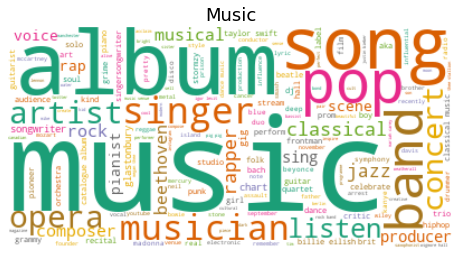

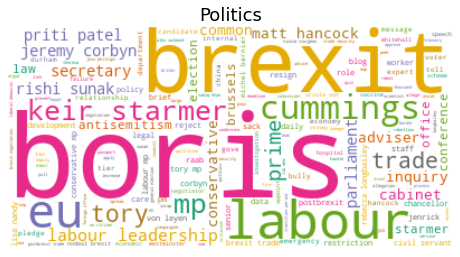

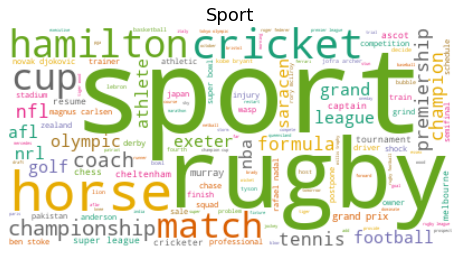

In [48]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", random_state=42)

df_wc = df1.copy()
df_wc.set_index('label', inplace=True)

cats = ['Music','Politics', 'Sport']
    
for i in cats:
    plt.figure( figsize=(8,8))
    wc.generate(df_wc.news[i])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(i, fontsize=18)
    plt.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> In this step, we are just looking at the unique words in each category, and after n-gramming, we can see from the dataframe at the start, that Sport has the highest number of unique words followed by Music and the lowest number of unique words are in the Politics category.</b></p></li>
    <li><p style="text-align:justify;"><b> But, by looking at the wordcloud above, we can conspicuously see that the dataframe is completely cleaned and each category has evident specific set of words pertaining to what they uniquely define. This is what I wanted to achieve after doing such a comprehensive cleaning.</b></p></li>
</ul>

***

<center><h2> <font color='green'> Defining Text Classification Function </font> </h2> </center>

In [49]:
def text_classify(df, classif=None, vectorizer=None):
    """
    Implements Text Classification of news categories(label) based on the dataframe (document-text) 
    provided along with the classification algorithm and vectorizing method supplied in the arguments.
    
    Arguments:
    df -- Pandas Dataframe(dataset) consisting of 2 columns namely, news and label to be passed for classification
    classif -- String for specifying the classification algorithm:
                                        "NB" = Multinomial Naive Bayes - Probability-based
                                        "SVM" = Support Vector Machine - Linear-based
                                        "RF" = Random Forest - Ensemble-based
    vectorizer -- Method passed with appropriate vectorization algorithm along with its appropriate arguments:
                            CountVectorizer(stop_words=stop_words, max_features=10000, analyzer="word"))
                            TfidfVectorizer(stop_words=stop_words, max_features=10000, analyzer="word"))
    Returns:
    accuracy -- returns the accuracy score of the model based on the evaluation of unseen data.
    auc -- returns the AUC-ROC score of the model based on the evaluation of unseen data.
    """
    # Unique Classes in the dataframe
    classes = np.unique(df['label'])
    
    # Stratified Train-Test Split
    X_train, X_test, y_train, y_test = model_selection.train_test_split \
    (df['news'], df['label'], test_size=0.3, random_state=0, stratify= df['label'])
    
    # Vectorisation
    vectorizer.fit(df['news'])
    X_train =  vectorizer.transform(X_train).toarray()
    X_test =  vectorizer.transform(X_test).toarray()
    # dic_vocabulary = vectorizer.vocabulary_ # just for checking the vocabulary of the vectorizer
    
    # Classification using NB
    if classif == "NB":
        previous_score=0
        for alpha in np.arange(0,1,0.1):
            sub_classifier=naive_bayes.MultinomialNB(alpha=alpha)
            sub_classifier.fit(X_train,y_train)
            y_pred=sub_classifier.predict(X_test)
            score = metrics.accuracy_score(y_test, y_pred)
            if score>previous_score:
                classifier=sub_classifier # getting the best classifier with the best score alpha value
        classifier.fit(X_train, y_train) # fitting the training set
        pred = classifier.predict(X_test) # predicting the unseen data
        predicted_prob = classifier.predict_proba(X_test) # predicting the probabilties for auc-score
    
    # Classification using SVM
    if classif == "SVM":
        classifier = linear_model.SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, 
                                                random_state=0, max_iter=5, n_jobs=-1)
        classifier.fit(X_train, y_train) # fitting the training set
        pred = classifier.predict(X_test) # predicting the unseen data
        clf = classifier.fit(X_train, y_train) # Fitting For auc-score
        calibrator = CalibratedClassifierCV(clf, cv='prefit') # Using the CalibratedClassifier for SVM AUC-ROC curve
        model=calibrator.fit(X_train, y_train)
        predicted_prob = model.predict_proba(X_test) # predicting the probabilties for auc-score
        
    # Classification using Random Forest
    if classif == "RF":
        classifier = ensemble.RandomForestClassifier(n_jobs =-1, random_state=0)
        classifier.fit(X_train, y_train) # fitting the training set
        pred = classifier.predict(X_test) # predicting the unseen data
        predicted_prob = classifier.predict_proba(X_test) # predicting the probabilties for auc-score
        
    ## Get evaluation metrics    
    y_test_array = pd.get_dummies(y_test, drop_first=False).values # changing the shape of y_test for roc-score
    
    accuracy = metrics.accuracy_score(y_test, pred) # returning the accuracy
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)# returning the auc-score
    print("Accuracy:",  np.round(accuracy,2) * 100)
    print("Auc:", np.round(auc,2) * 100)
    print("Detail:")
    print(metrics.classification_report(y_test, pred))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, pred)
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Predicted", ylabel="True Values", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
    
    ## Plot ROC-AUC curve
    plt.figure(figsize=(8,6))
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                               predicted_prob[:,i])
        plt.plot(fpr, tpr, lw=3, 
                  label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr) * 100)
                   )
    plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="best")
    plt.show()
    
    ## Plot precision-recall curve
    plt.figure(figsize=(8,6))
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        plt.plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision) * 100)
                  )
    plt.xlim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall curve")
    plt.legend(loc="best")
    plt.show()
    
    return accuracy, auc

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Now, rather than writing all the classification steps ranging from train-test split to vectorization to fitting the model and evaluating it for all the unique pairs and finally the whole multi-class dataset, I thought about creating a complete function which could be simply called with special arguments defined by me. The description, arguments and returns of the function are present in the function itself.</b></p></li>
     <li><p style="text-align:justify;"><b> For the vectorisation purpose, I'm using the TFIDF and Count Vectorisers along with the bag of words and ngram methods. We can also prefer other vectorisation methods, but a complete method with its parameters should be passed as an argument to the function above.</b></p></li>
    <li><p style="text-align:justify;"><b> For training purposes, I've specified the NB, SVM, and RF algorithms, which are given examples of in the function itself. These strings are hard-ruled and one can also introduce scope of some other ML algorithm by creating another if condition. But the algorithms which I have chosen are state of the art machine learning algorithms widely used for Text Classification. There is presence of one probability-based, linear-based and ensemble-based algorithm each.</b></p></li>
    <li><p style="text-align:justify;"><b> Further for evaluation purpose, I have used the Accuracy, AUC-Score along with a detailed classification report, and plotting confusion matrix, auc curve and precision-recall curve.</b></p></li>
</ul>

***

> ## TASK 2. Binary Text Classification:

***

<h3 style="text-align:justify;"><b>
As the comprehensive text preprocessing and defination of text classification function is done, we proceed to make unique pairs of the 3 categories choosen into:
    <ul>
    <li><p style="text-align:justify;"><b> Music-Sport.</b></p></li>
     <li><p style="text-align:justify;"><b> Sport-Politics.</b></p></li>
    <li><p style="text-align:justify;"><b> Music-Politics.</b></p></li>
</ul>
These categories are further defined as different dataframes and used for applying the text classification function, along with its other discussed parameters. At the end, we also look at the comparison of different ML algorithms and vectorisers used for each unique pair in accordance to their accuracy and auc-score's
    </b></h3>

<center><h2> <font color='green'> Unique Pair (Music, Sport) </font> </h2> </center>

In [50]:
#Defining the lists to store all the scores to compare in the end
list_mus_spo_AUC_ROC = []
list_mus_spo_Accuracy = []
list_mus_spo_models = []
list_mus_spo_vectorizers = []

In [51]:
#Defining the music-sport dataframe
df_music_sport = df[(df['label'] == 'Music') | (df['label'] == 'Sport')]
df_music_sport['label'].value_counts()

Sport    1819
Music    1797
Name: label, dtype: int64

<center><h3> <font color='blue'> Support Vector Machine </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.94      0.95       539
       Sport       0.94      0.95      0.95       546

    accuracy                           0.95      1085
   macro avg       0.95      0.95      0.95      1085
weighted avg       0.95      0.95      0.95      1085



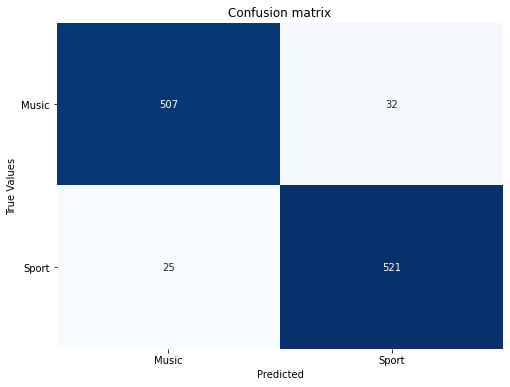

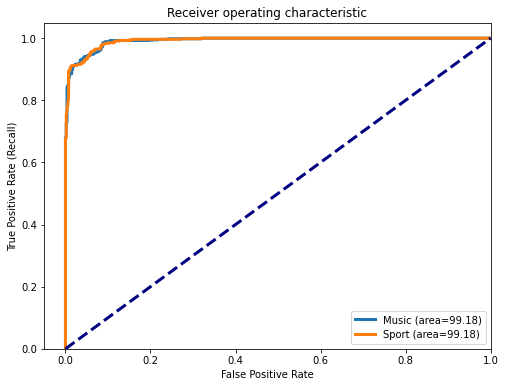

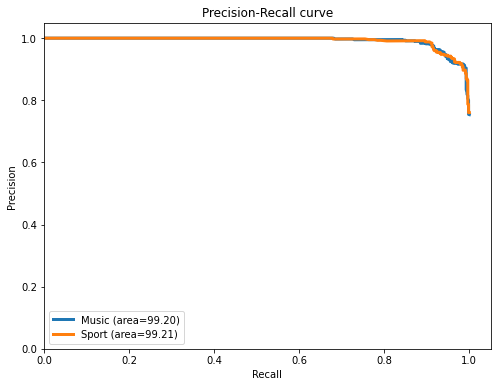

In [52]:
# Using SVM with word type count vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("CV-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.93      0.95      0.94       539
       Sport       0.95      0.93      0.94       546

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



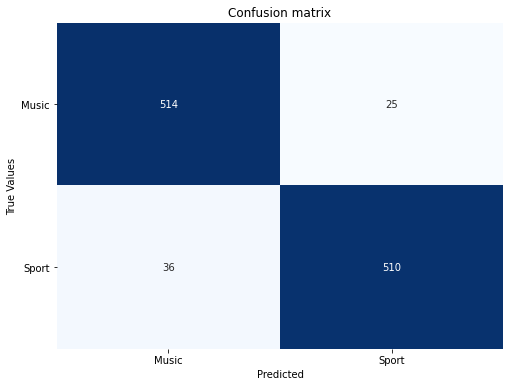

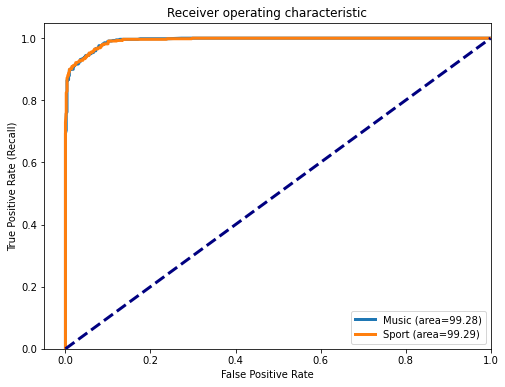

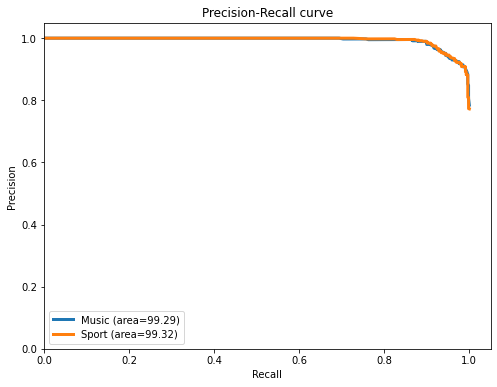

In [53]:
# Using SVM with word-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("CV-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 86.0
Auc: 97.0
Detail:
              precision    recall  f1-score   support

       Music       0.79      0.99      0.88       539
       Sport       0.98      0.74      0.84       546

    accuracy                           0.86      1085
   macro avg       0.89      0.86      0.86      1085
weighted avg       0.89      0.86      0.86      1085



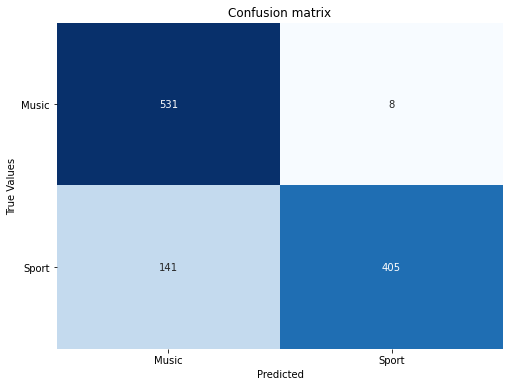

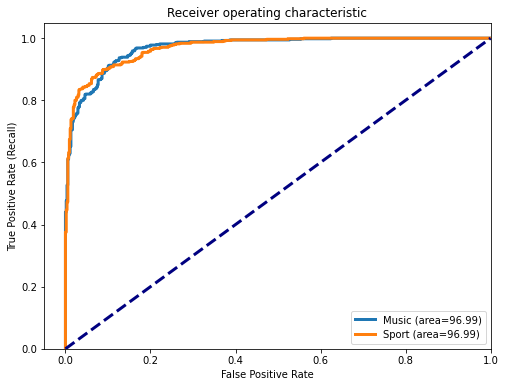

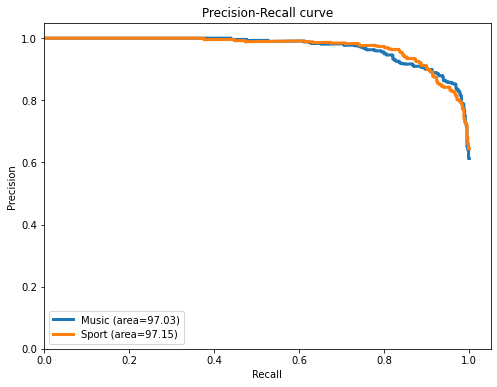

In [54]:
# Using SVM with char-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("CV-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 94.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.90      0.99      0.94       539
       Sport       0.99      0.89      0.94       546

    accuracy                           0.94      1085
   macro avg       0.95      0.94      0.94      1085
weighted avg       0.95      0.94      0.94      1085



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


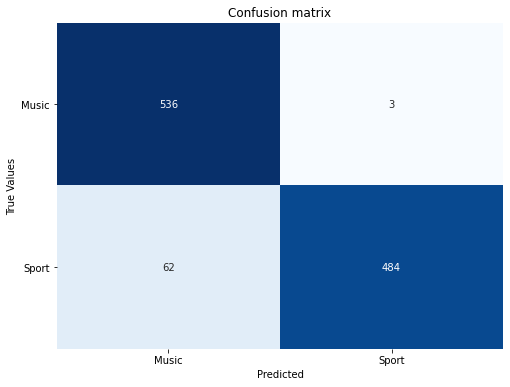

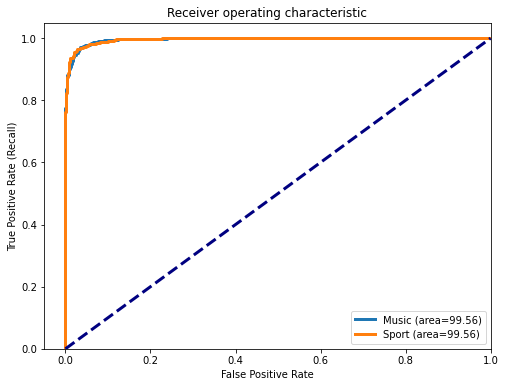

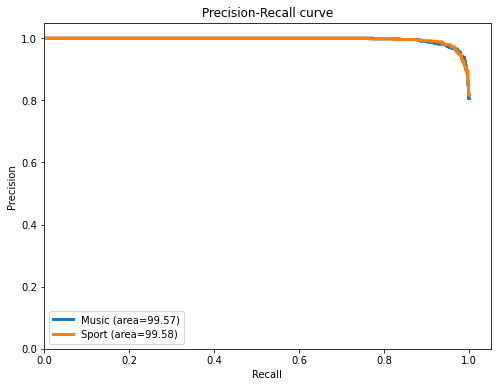

In [55]:
# Using SVM with word type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("TFIDF-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.93      0.99      0.96       539
       Sport       0.99      0.92      0.96       546

    accuracy                           0.96      1085
   macro avg       0.96      0.96      0.96      1085
weighted avg       0.96      0.96      0.96      1085



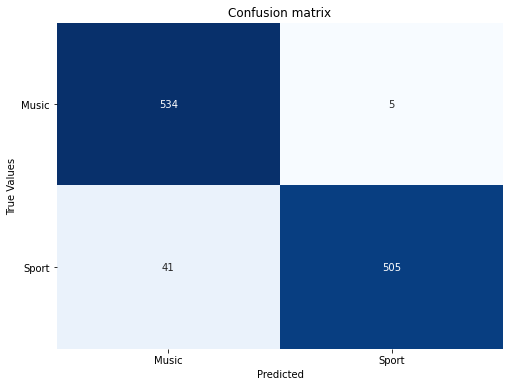

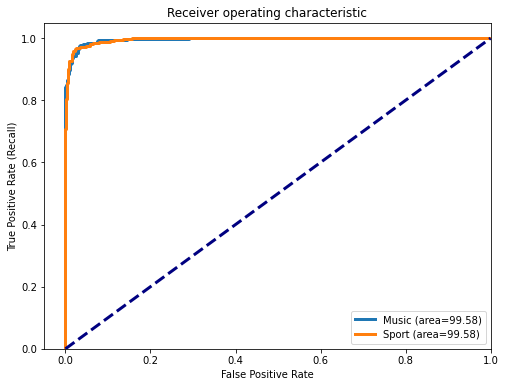

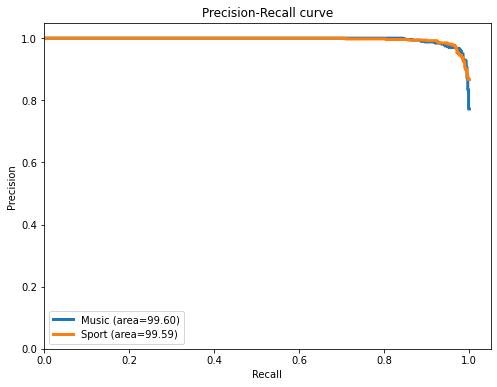

In [56]:
# Using SVM with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("TFIDF-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy: 90.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.83      0.99      0.90       539
       Sport       0.98      0.81      0.89       546

    accuracy                           0.90      1085
   macro avg       0.91      0.90      0.90      1085
weighted avg       0.91      0.90      0.90      1085



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


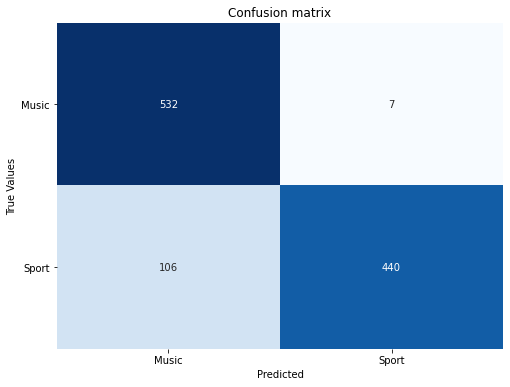

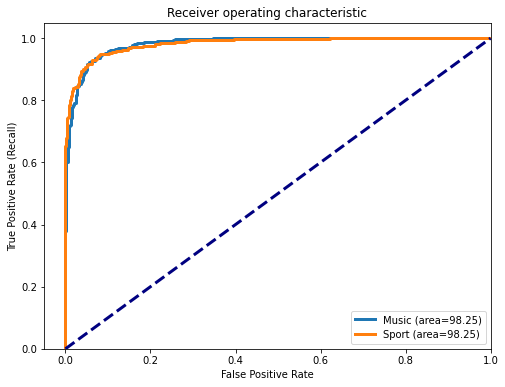

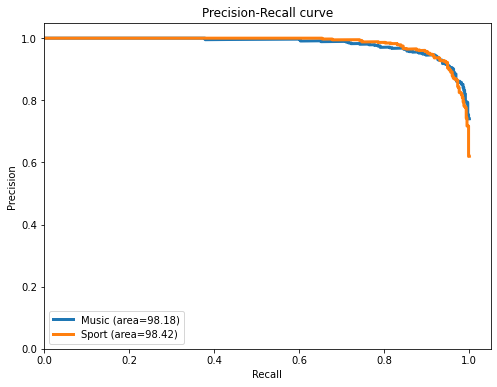

In [57]:
# Using SVM with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Support Vector Machine")
list_mus_spo_vectorizers.append("TFIDF-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Multinomial Naive Bayes </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.98      0.97      0.97       539
       Sport       0.97      0.98      0.97       546

    accuracy                           0.97      1085
   macro avg       0.97      0.97      0.97      1085
weighted avg       0.97      0.97      0.97      1085



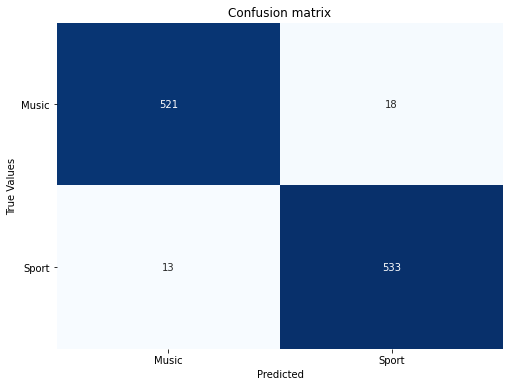

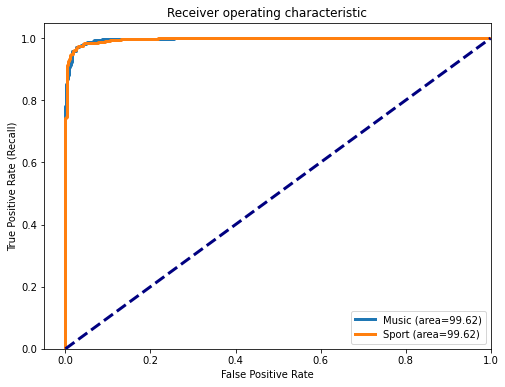

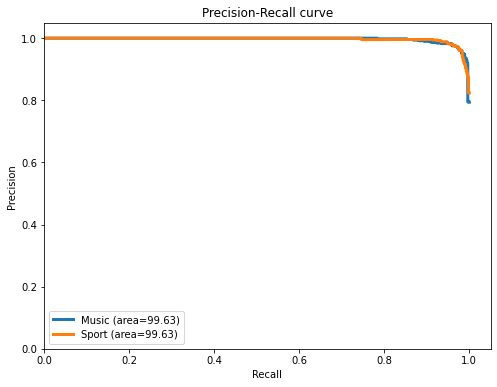

In [58]:
# Using NB with word type count vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("CV-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.97      0.97      0.97       539
       Sport       0.97      0.97      0.97       546

    accuracy                           0.97      1085
   macro avg       0.97      0.97      0.97      1085
weighted avg       0.97      0.97      0.97      1085



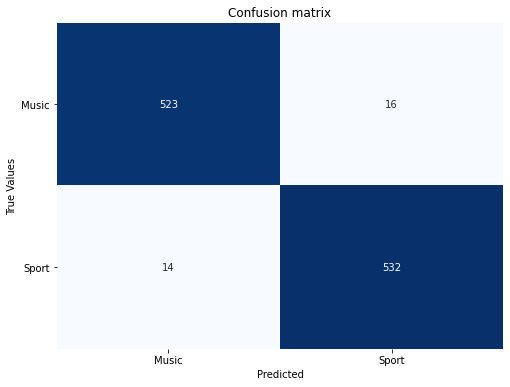

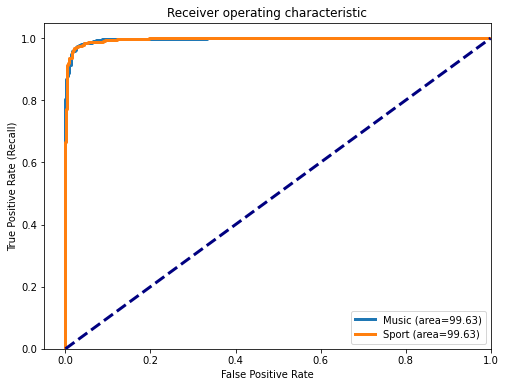

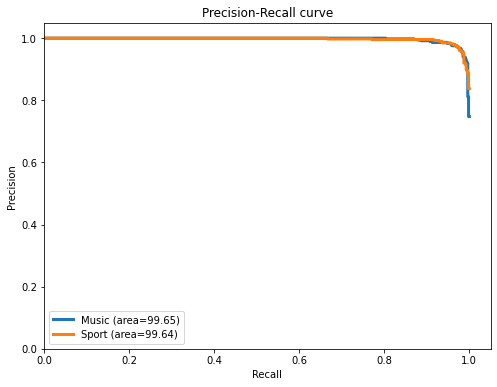

In [59]:
# Using NB with word-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("CV-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      0.94      0.94       539
       Sport       0.94      0.94      0.94       546

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



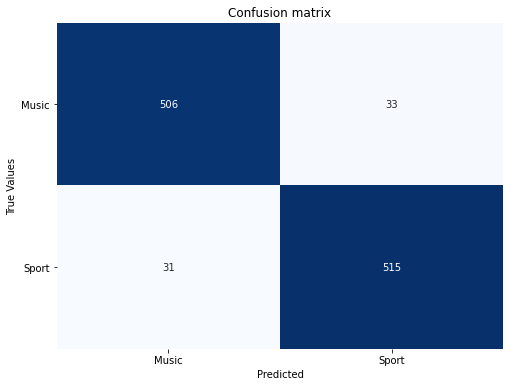

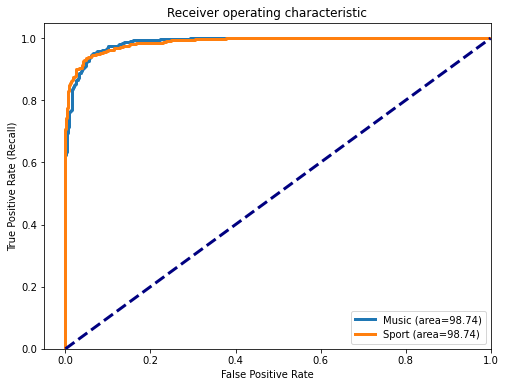

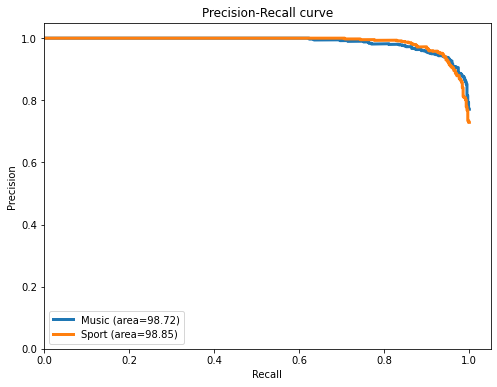

In [60]:
# Using NB with char-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("CV-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 96.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.97      0.96      0.96       539
       Sport       0.96      0.97      0.96       546

    accuracy                           0.96      1085
   macro avg       0.96      0.96      0.96      1085
weighted avg       0.96      0.96      0.96      1085



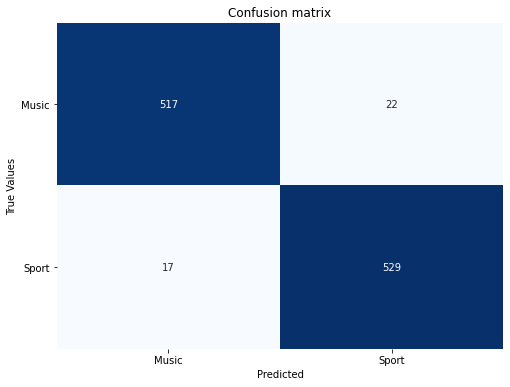

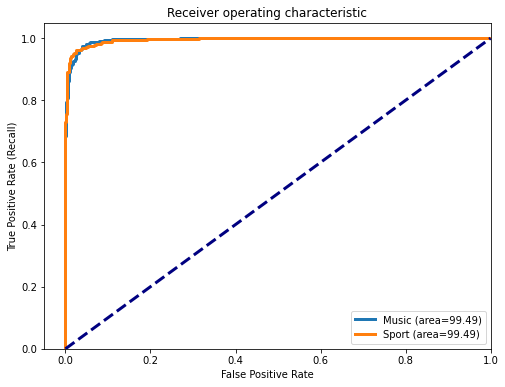

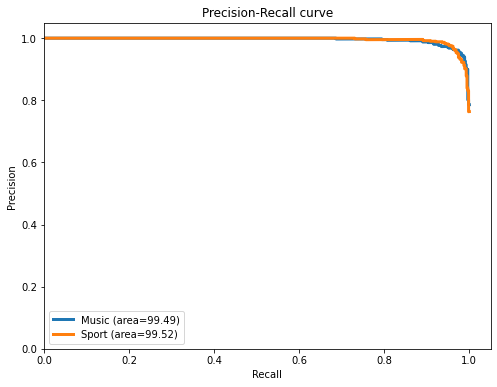

In [61]:
# Using NB with word type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("TFIDF-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.97      0.96      0.96       539
       Sport       0.96      0.97      0.96       546

    accuracy                           0.96      1085
   macro avg       0.96      0.96      0.96      1085
weighted avg       0.96      0.96      0.96      1085



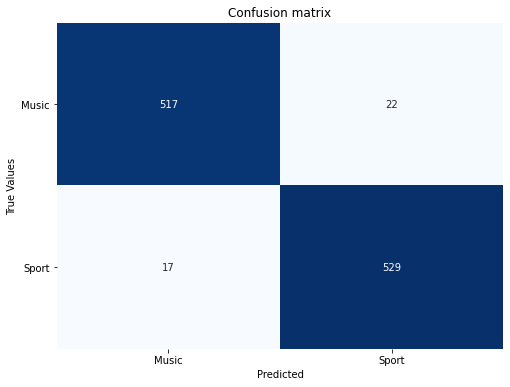

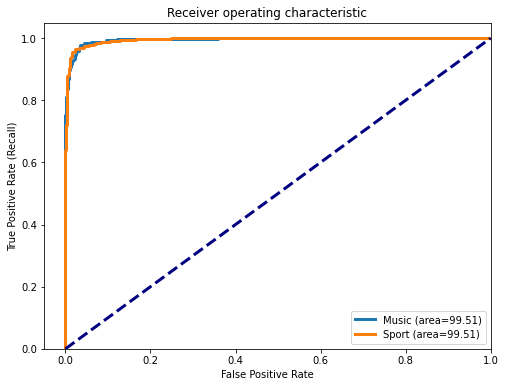

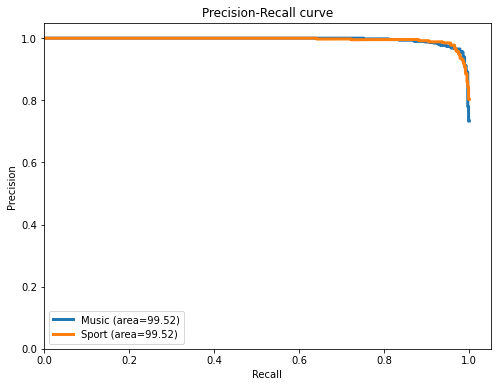

In [62]:
# Using NB with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("TFIDF-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy: 93.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.91      0.93       539
       Sport       0.91      0.96      0.94       546

    accuracy                           0.93      1085
   macro avg       0.93      0.93      0.93      1085
weighted avg       0.93      0.93      0.93      1085



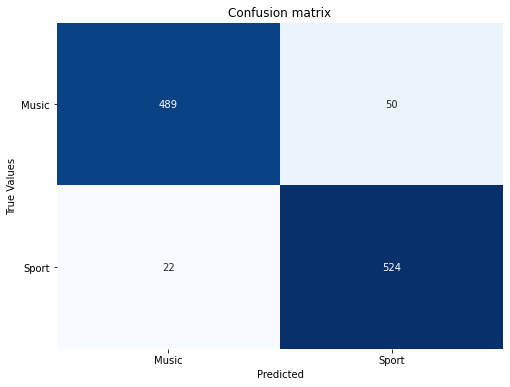

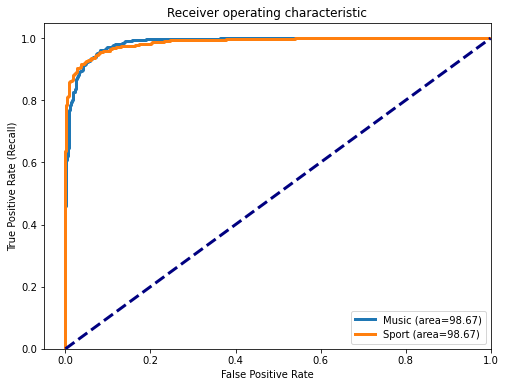

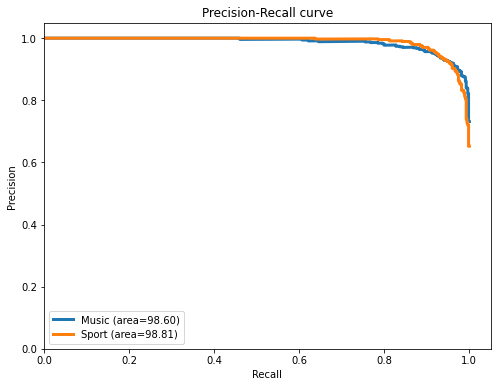

In [63]:
# Using NB with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Multinomial Naive Bayes")
list_mus_spo_vectorizers.append("TFIDF-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Random Forest Classifier </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

Accuracy: 92.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.99      0.85      0.91       539
       Sport       0.87      0.99      0.93       546

    accuracy                           0.92      1085
   macro avg       0.93      0.92      0.92      1085
weighted avg       0.93      0.92      0.92      1085



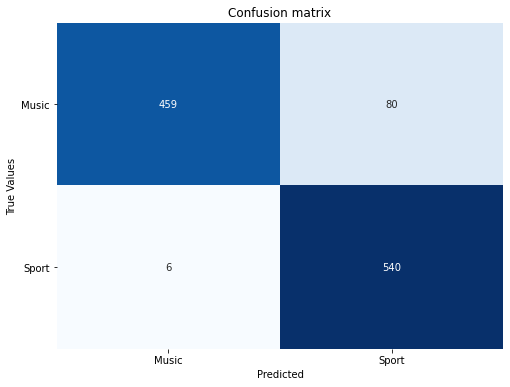

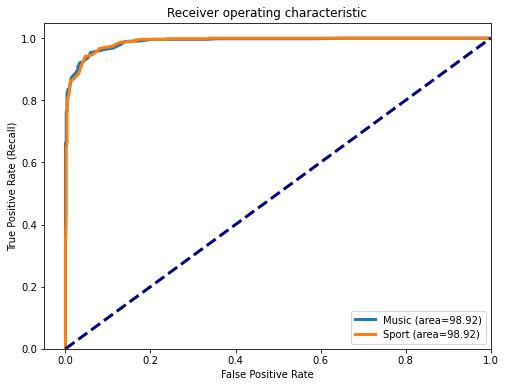

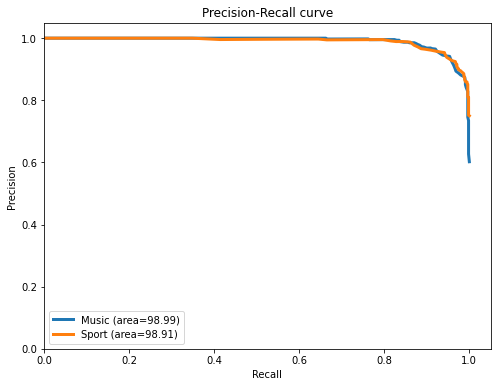

In [64]:
# Using RFC with word type count vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("CV-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

Accuracy: 91.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.99      0.83      0.90       539
       Sport       0.85      0.99      0.92       546

    accuracy                           0.91      1085
   macro avg       0.92      0.91      0.91      1085
weighted avg       0.92      0.91      0.91      1085



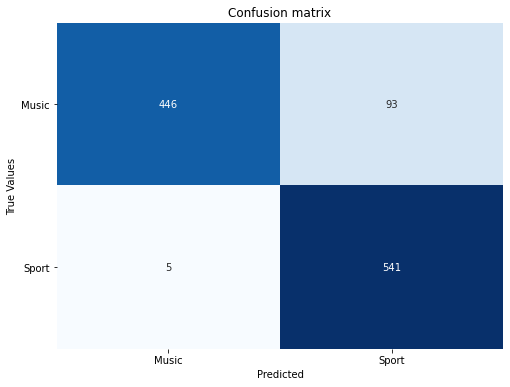

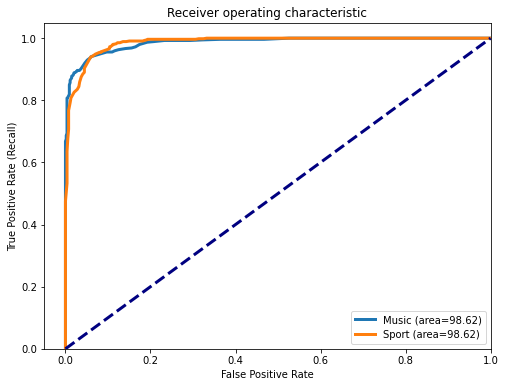

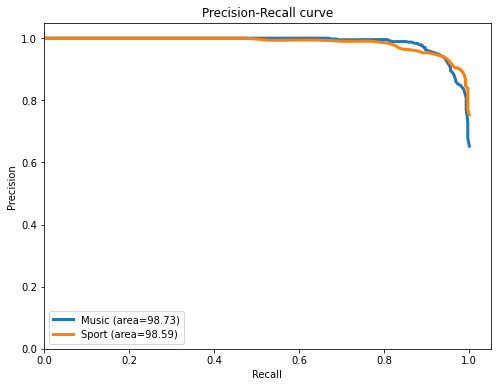

In [65]:
# Using RFC with word-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("CV-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


Accuracy: 89.0
Auc: 97.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.83      0.88       539
       Sport       0.85      0.95      0.90       546

    accuracy                           0.89      1085
   macro avg       0.90      0.89      0.89      1085
weighted avg       0.90      0.89      0.89      1085



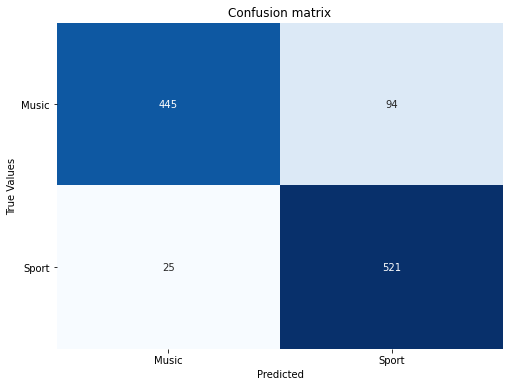

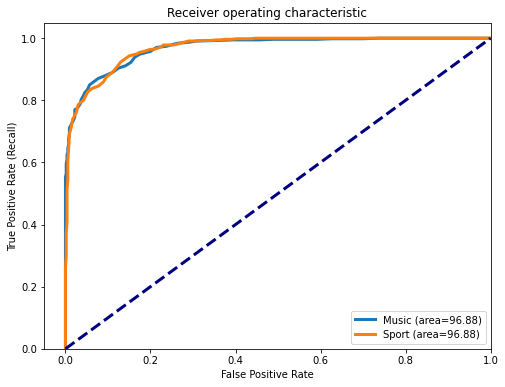

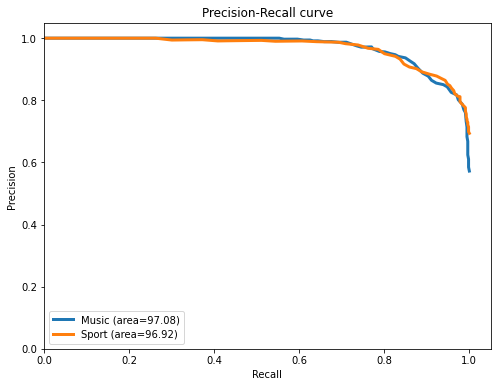

In [66]:
# Using RFC with char-ngram type count vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("CV-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

Accuracy: 93.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.99      0.87      0.93       539
       Sport       0.89      0.99      0.94       546

    accuracy                           0.93      1085
   macro avg       0.94      0.93      0.93      1085
weighted avg       0.94      0.93      0.93      1085



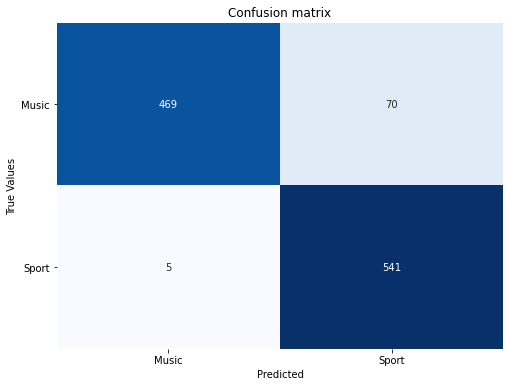

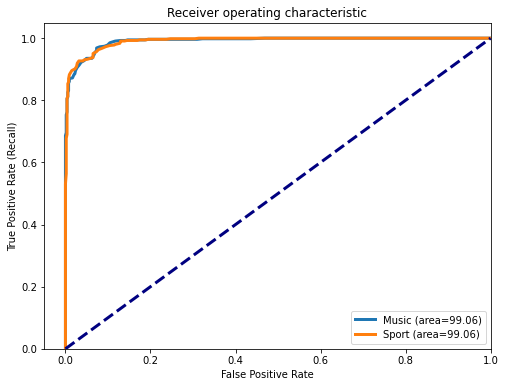

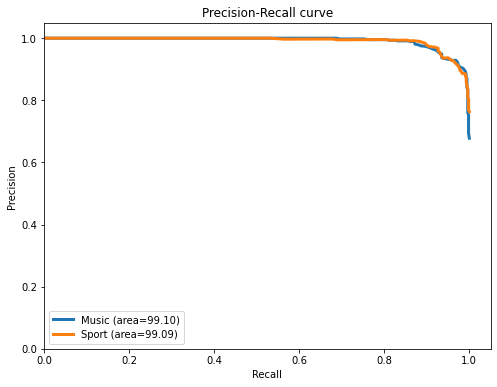

In [67]:
# Using RFC with word type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("TFIDF-word")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

Accuracy: 91.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.99      0.82      0.90       539
       Sport       0.85      0.99      0.92       546

    accuracy                           0.91      1085
   macro avg       0.92      0.91      0.91      1085
weighted avg       0.92      0.91      0.91      1085



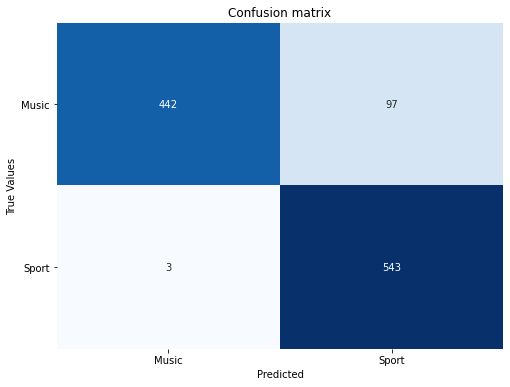

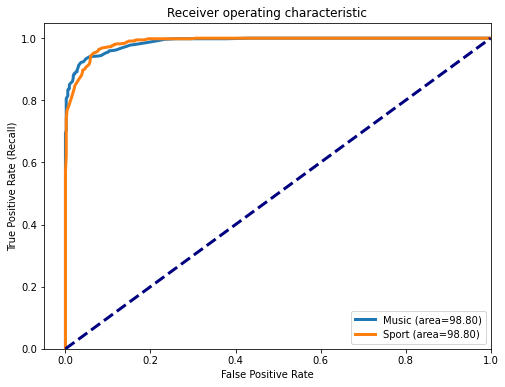

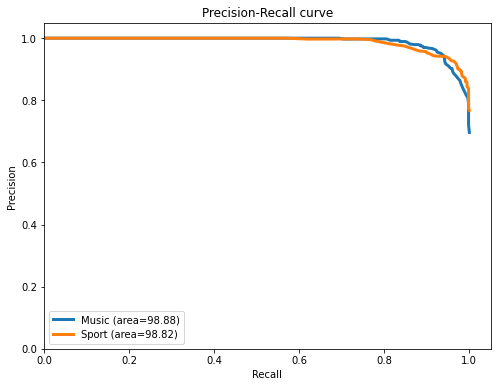

In [68]:
# Using RFC with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("TFIDF-word-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


Accuracy: 89.0
Auc: 97.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      0.84      0.89       539
       Sport       0.86      0.95      0.90       546

    accuracy                           0.89      1085
   macro avg       0.90      0.89      0.89      1085
weighted avg       0.90      0.89      0.89      1085



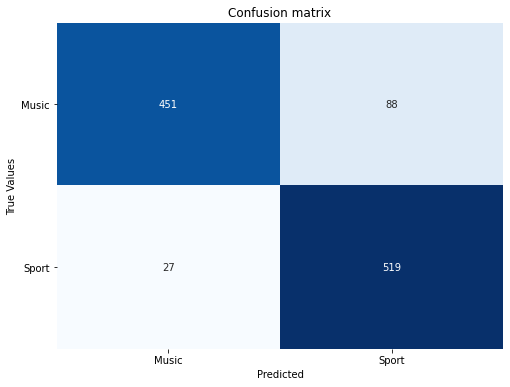

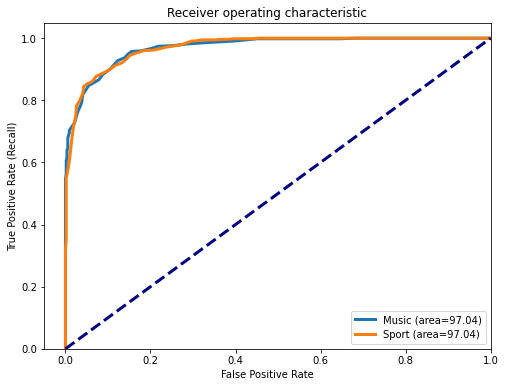

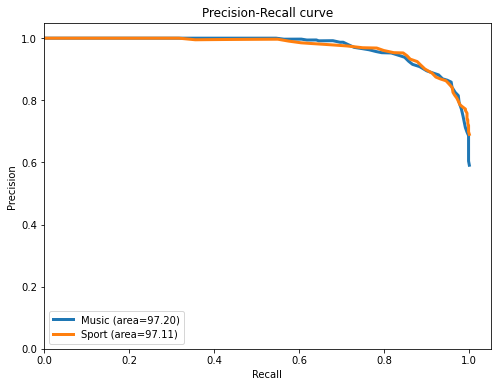

In [69]:
# Using RFC with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_sport, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_mus_spo_models.append("Random Forest Classifier")
list_mus_spo_vectorizers.append("TFIDF-char-ngram")
list_mus_spo_Accuracy.append(acc)
list_mus_spo_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Comparing All the Models for Music-Sport </font> </h3> </center>

In [145]:
# Creating final dataframe
final_scores_music_sport = pd.DataFrame(list_mus_spo_models, columns = ['Models'])
final_scores_music_sport['Vectorizers'] = list_mus_spo_vectorizers
final_scores_music_sport['Accuracy'] = list_mus_spo_Accuracy
final_scores_music_sport['AUC_ROC_Score'] = list_mus_spo_AUC_ROC
final_scores_music_sport = final_scores_music_sport.sort_values(by = 'Accuracy', ascending=False)

In [146]:
final_scores_music_sport.reset_index(inplace=True, drop='index')
final_scores_music_sport

Models       Vectorizers  Accuracy  AUC_ROC_Score
0    Multinomial Naive Bayes     CV-word-ngram  0.972350       0.996344
1    Multinomial Naive Bayes           CV-word  0.971429       0.996232
2    Multinomial Naive Bayes        TFIDF-word  0.964055       0.994893
3    Multinomial Naive Bayes  TFIDF-word-ngram  0.964055       0.995066
4     Support Vector Machine  TFIDF-word-ngram  0.957604       0.995817
5     Support Vector Machine           CV-word  0.947465       0.991757
6     Support Vector Machine     CV-word-ngram  0.943779       0.992847
7    Multinomial Naive Bayes     CV-char-ngram  0.941014       0.987414
8     Support Vector Machine        TFIDF-word  0.940092       0.995620
9    Multinomial Naive Bayes  TFIDF-char-ngram  0.933641       0.986683
10  Random Forest Classifier        TFIDF-word  0.930876       0.990642
11  Random Forest Classifier           CV-word  0.920737       0.989225
12  Random Forest Classifier     CV-word-ngram  0.909677       0.986162
13  Random Forest Classifier  TFIDF-word-ngram  0.907834       0.988043
14    Support Vector Machine  TFIDF-char-ngram  0.895853       0.982477
15  Random Forest Classifier  TFIDF-char-ngram  0.894009       0.970361
16  Random Forest Classifier     CV-char-ngram  0.890323       0.968810
17    Support Vector Machine     CV-char-ngram  0.862673       0.969869

In [163]:
fig = px.bar(final_scores_music_sport, x="Accuracy", color="Vectorizers",
             y='Models',
             barmode='group',
             height=600, text=round(final_scores_music_sport['Accuracy']* 100,2), orientation='h'
            )
fig.update_layout(title={'text': f"Comparison of Models based on Accuracy for Music-Sport Categories", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Accuracy", yaxis_title="Models")
fig.show()

<center><h3> <font color='blue'> Evaluation Discussions for Music-Sport Category </font> </h3> </center>


<ul>
    <li><p style="text-align:justify;"><b> As we can see from the comparisons graph above for the Music-Sport Category, the picture is evident enough to elaborate each and everything, even by hovering over it we can get a conspicuous understanding.</b></p></li>
    <li><p style="text-align:justify;"><b> After implementing each vectorizer-model combination, we see that the Multinomial Naive Bayes with Count Vectorizer word-ngram parameters has given the highest accuracy of 97.24% along with an ROC of 99.63%, which is outstanding for any classification algorithm.</b></p></li>
     <li><p style="text-align:justify;"><b> We can also see that the character-ngram vectorizers are having the lowest score among all the vectorizers used.</b></p></li>
    <li><p style="text-align:justify;"><b> Multinomial NB is showing nearly excellent results for all vectorisers, whereas the ensemble technique Random Forest Classifier has the weakest performance for all the vectorisers.</b></p></li>
    <li><p style="text-align:justify;"><b> We can thus infer that probability-based machine learning models could be best for the music-sport category, while we could refrain from using other ensemble techniques for this type of problem.</b></p></li>
</ul>

***

<center><h2> <font color='green'> Unique Pair (Sport, Politics) </font> </h2> </center>

In [73]:
#Defining the lists to store all the scores to compare in the end
list_spo_pol_AUC_ROC = []
list_spo_pol_Accuracy = []
list_spo_pol_models = []
list_spo_pol_vectorizers = []

In [74]:
df_sport_pol = df[(df['label'] == 'Sport') | (df['label'] == 'Politics')]
df_sport_pol['label'].value_counts()

Sport       1819
Politics    1808
Name: label, dtype: int64

<center><h3> <font color='blue'> Support Vector Machine </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

    Politics       0.97      0.95      0.96       543
       Sport       0.95      0.97      0.96       546

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089



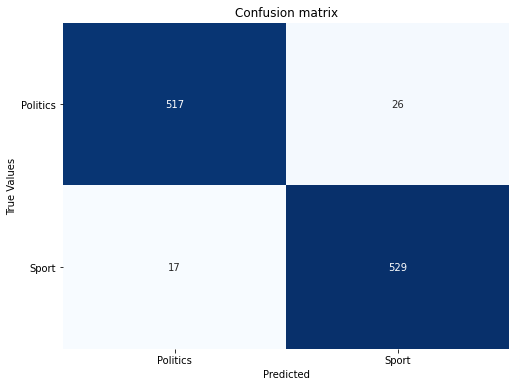

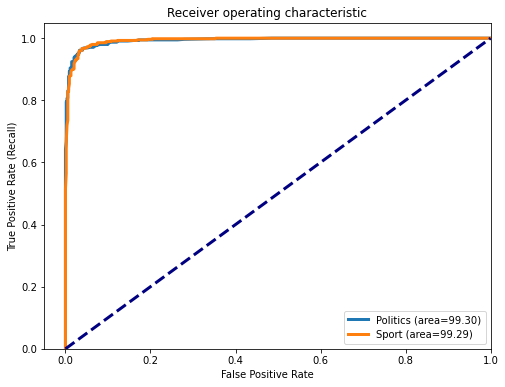

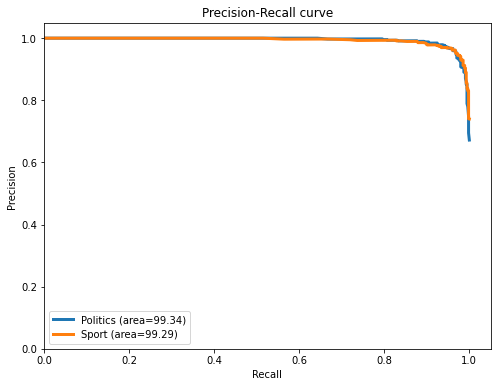

In [75]:
# Using SVM with word type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("CV-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

    Politics       0.97      0.95      0.96       543
       Sport       0.95      0.97      0.96       546

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089



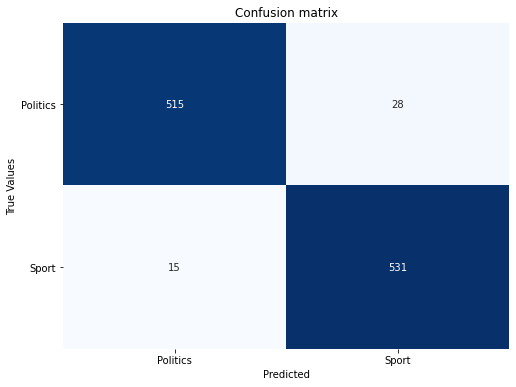

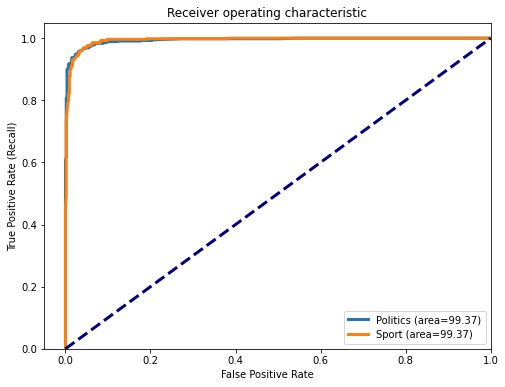

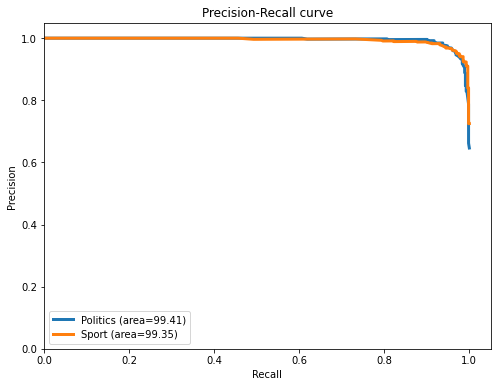

In [76]:
# Using SVM with word-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("CV-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 85.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.71      0.82       543
       Sport       0.77      0.99      0.87       546

    accuracy                           0.85      1089
   macro avg       0.88      0.85      0.85      1089
weighted avg       0.88      0.85      0.85      1089



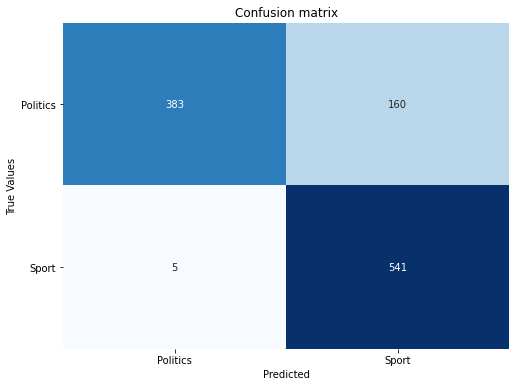

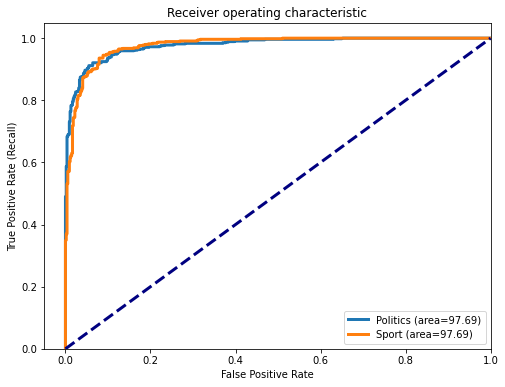

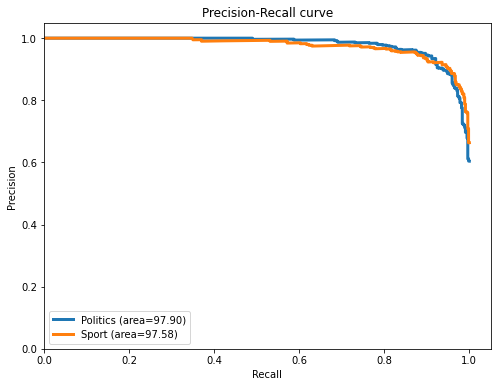

In [77]:
# Using SVM with char-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("CV-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.93      0.96       543
       Sport       0.93      0.99      0.96       546

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089



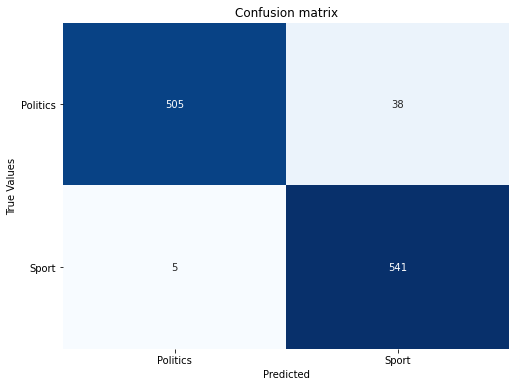

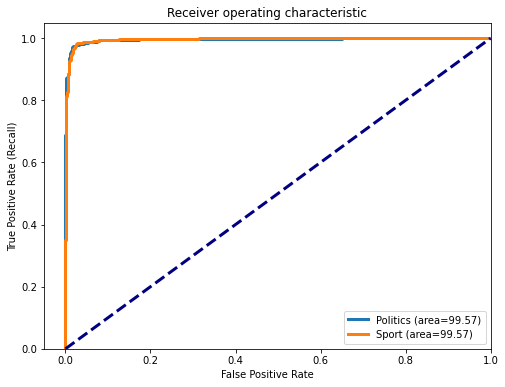

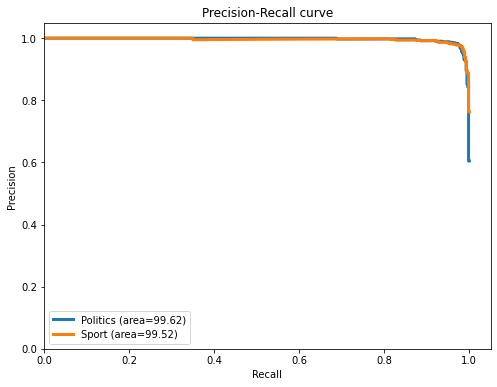

In [78]:
# Using SVM with word type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("TFIDF-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.93      0.96       543
       Sport       0.93      0.99      0.96       546

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089



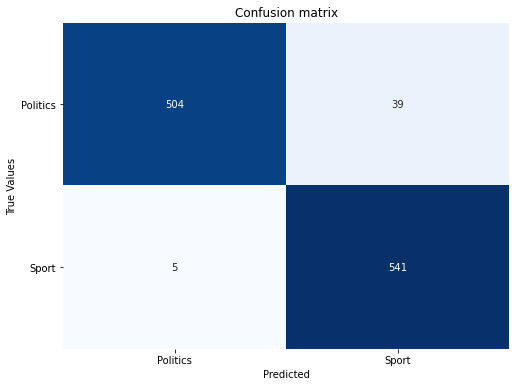

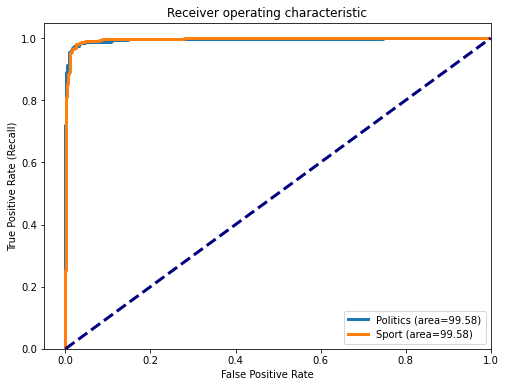

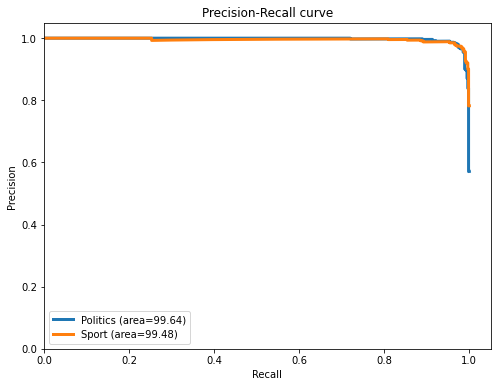

In [79]:
# Using SVM with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("TFIDF-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 95.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.95      0.94      0.95       543
       Sport       0.94      0.95      0.95       546

    accuracy                           0.95      1089
   macro avg       0.95      0.95      0.95      1089
weighted avg       0.95      0.95      0.95      1089



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



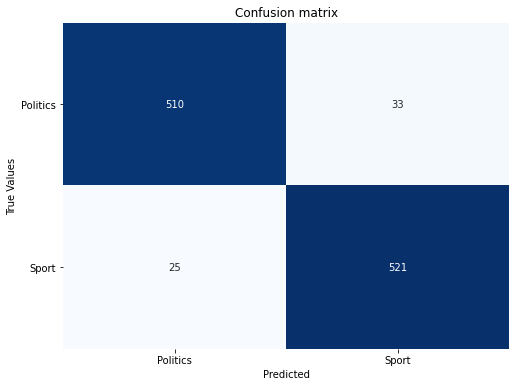

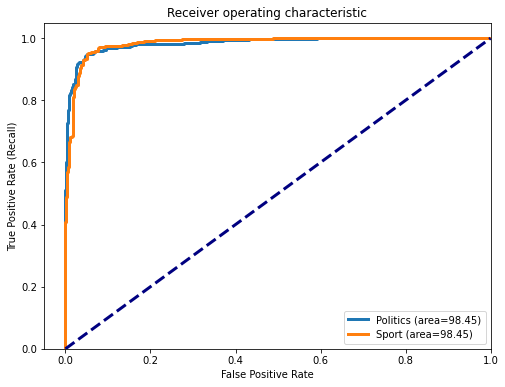

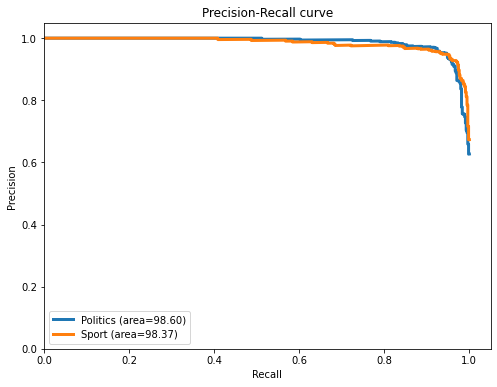

In [80]:
# Using SVM with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Support Vector Machine")
list_spo_pol_vectorizers.append("TFIDF-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Multinomial Naive Bayes </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.97      0.98      0.97       543
       Sport       0.98      0.97      0.97       546

    accuracy                           0.97      1089
   macro avg       0.97      0.97      0.97      1089
weighted avg       0.97      0.97      0.97      1089



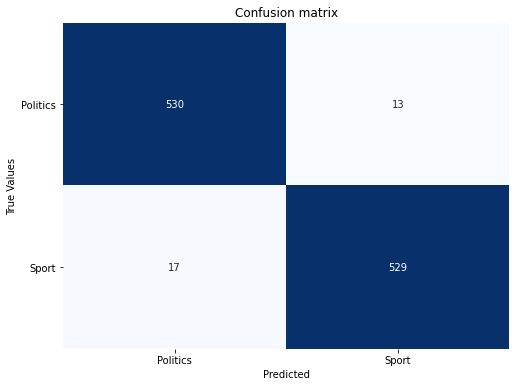

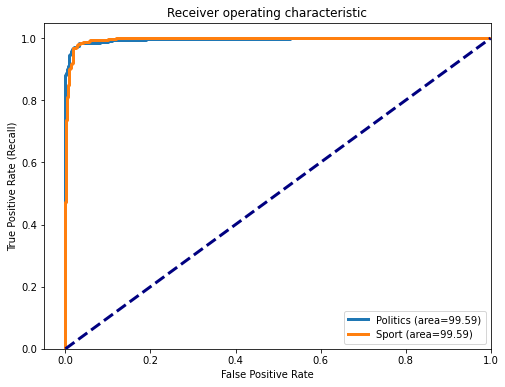

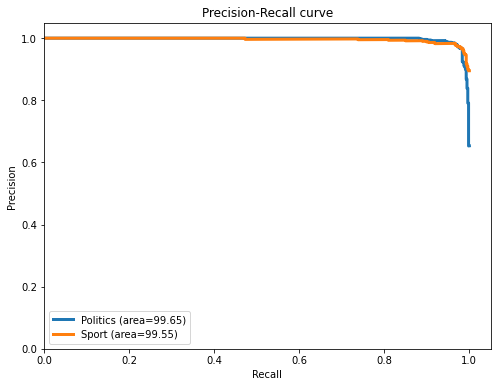

In [81]:
# Using NB with word type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("CV-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.98      0.97      0.97       543
       Sport       0.97      0.98      0.97       546

    accuracy                           0.97      1089
   macro avg       0.97      0.97      0.97      1089
weighted avg       0.97      0.97      0.97      1089



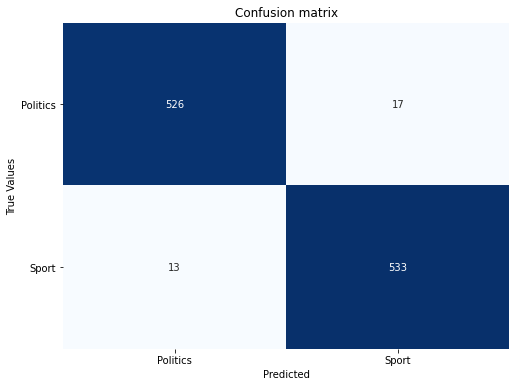

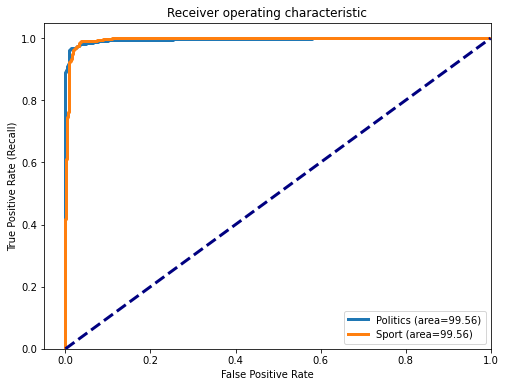

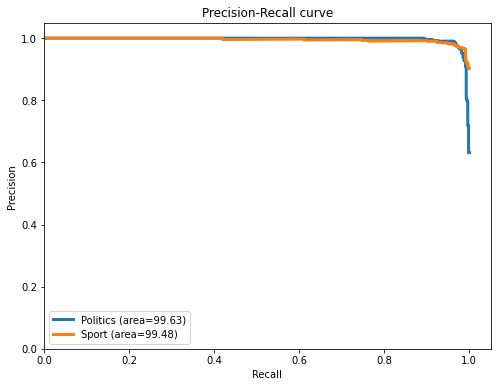

In [82]:
# Using NB with word-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("CV-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 94.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.96      0.91      0.94       543
       Sport       0.92      0.96      0.94       546

    accuracy                           0.94      1089
   macro avg       0.94      0.94      0.94      1089
weighted avg       0.94      0.94      0.94      1089



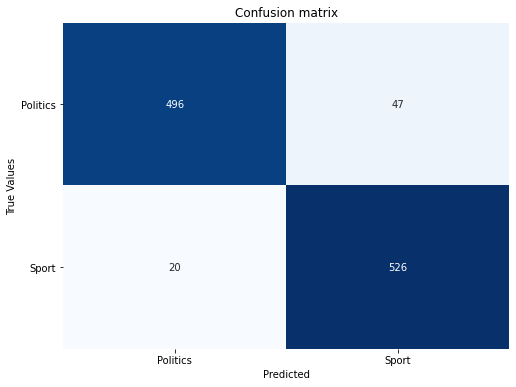

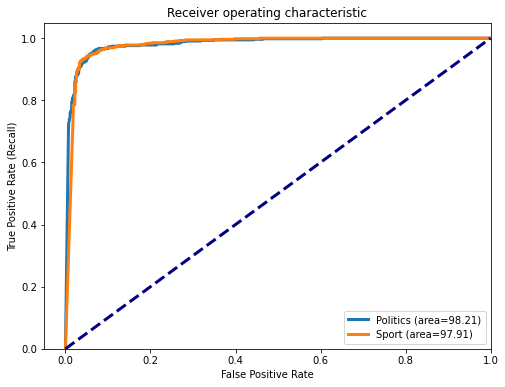

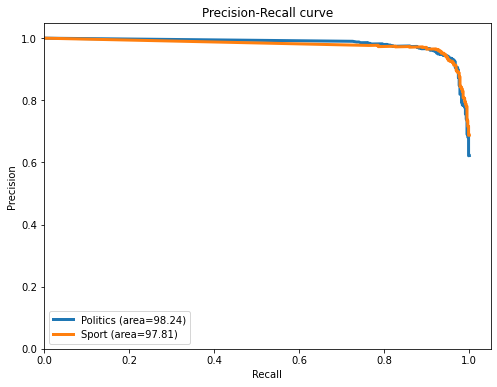

In [83]:
# Using NB with char-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("CV-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.97      0.98      0.97       543
       Sport       0.98      0.97      0.97       546

    accuracy                           0.97      1089
   macro avg       0.97      0.97      0.97      1089
weighted avg       0.97      0.97      0.97      1089



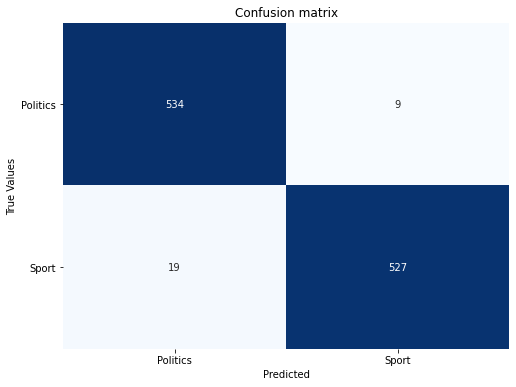

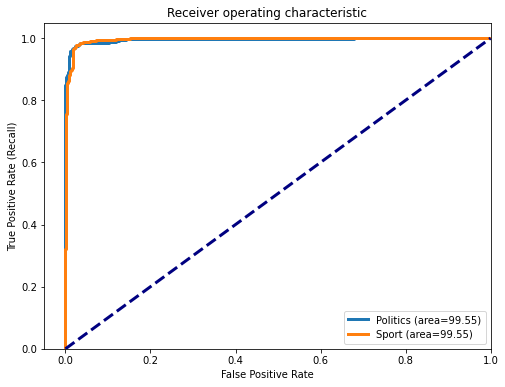

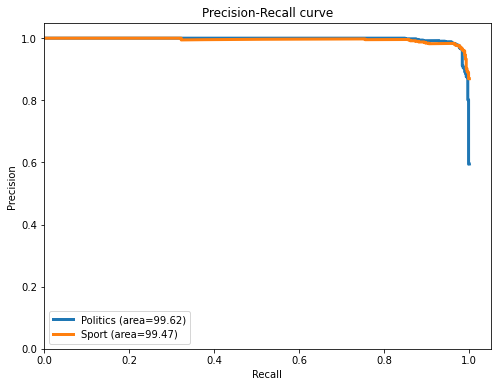

In [84]:
# Using NB with word type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("TFIDF-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 98.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

    Politics       0.98      0.98      0.98       543
       Sport       0.98      0.98      0.98       546

    accuracy                           0.98      1089
   macro avg       0.98      0.98      0.98      1089
weighted avg       0.98      0.98      0.98      1089



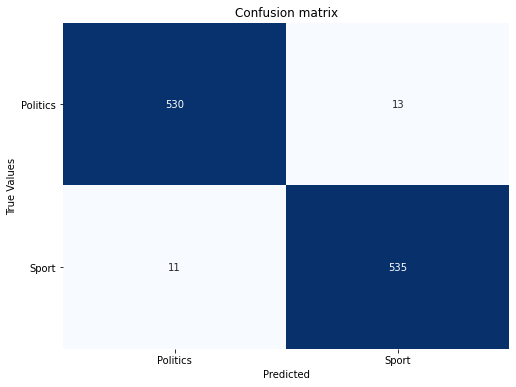

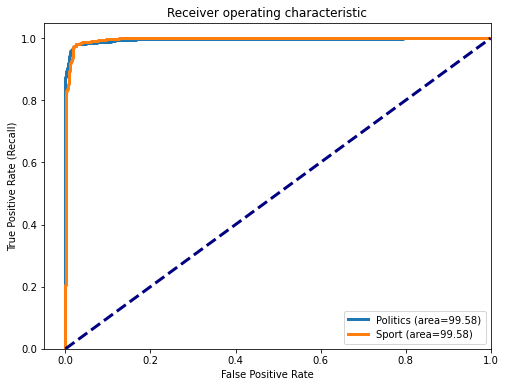

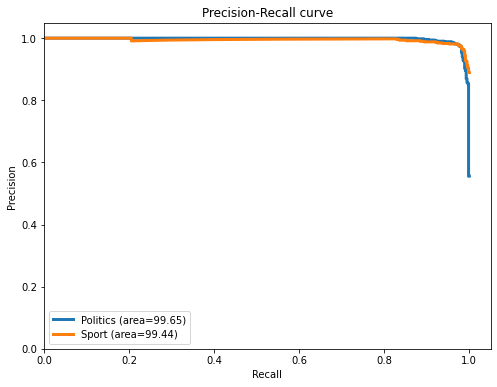

In [85]:
# Using NB with word-gram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("TFIDF-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 94.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.94      0.95      0.94       543
       Sport       0.95      0.94      0.94       546

    accuracy                           0.94      1089
   macro avg       0.94      0.94      0.94      1089
weighted avg       0.94      0.94      0.94      1089



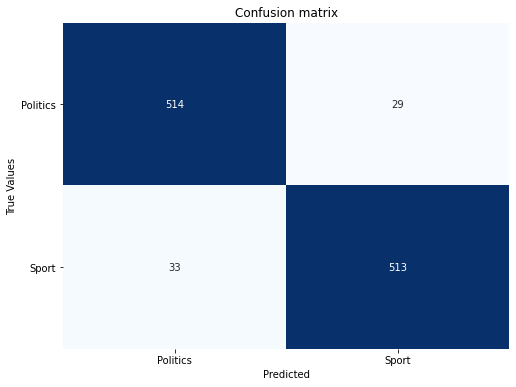

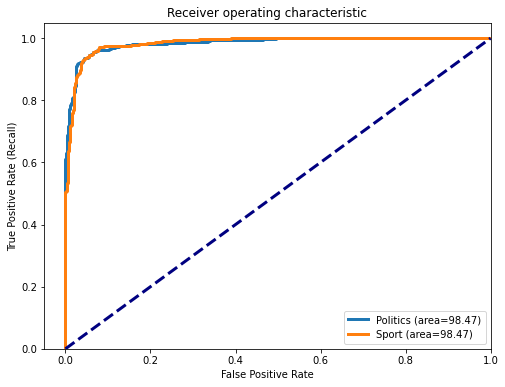

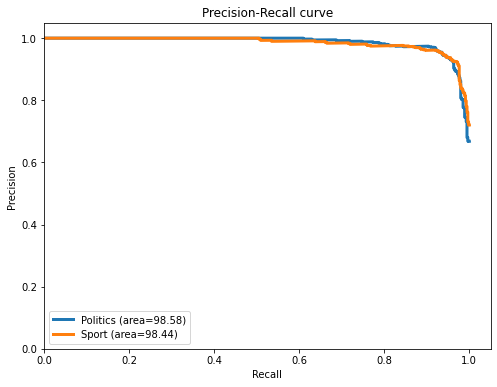

In [86]:
# Using NB with char-gram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Multinomial Naive Bayes")
list_spo_pol_vectorizers.append("TFIDF-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Random Forest Classifier </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.90      0.94       543
       Sport       0.90      0.99      0.94       546

    accuracy                           0.94      1089
   macro avg       0.95      0.94      0.94      1089
weighted avg       0.94      0.94      0.94      1089



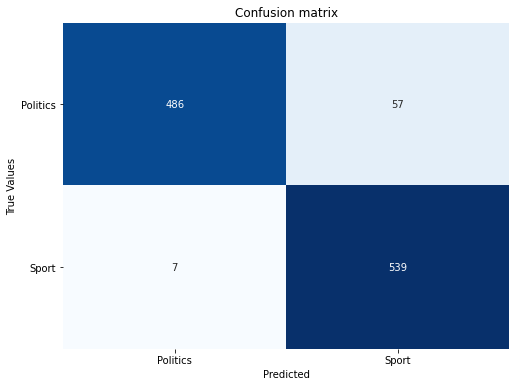

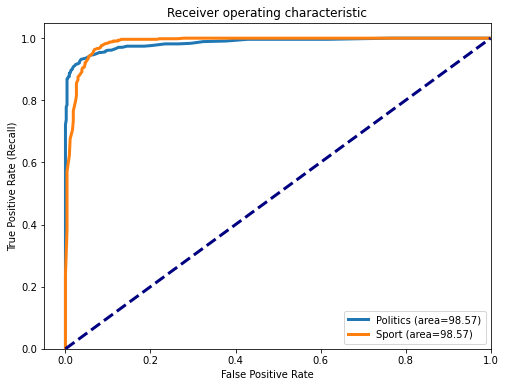

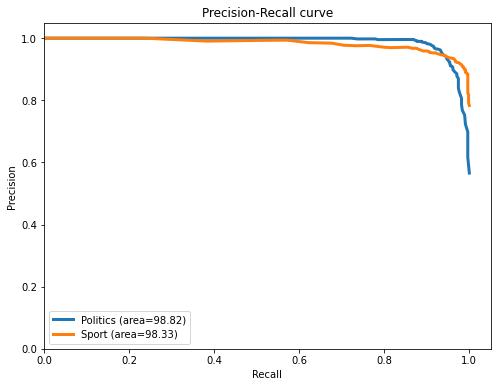

In [87]:
# Using RFC with word type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("CV-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.89      0.94       543
       Sport       0.90      0.99      0.94       546

    accuracy                           0.94      1089
   macro avg       0.94      0.94      0.94      1089
weighted avg       0.94      0.94      0.94      1089



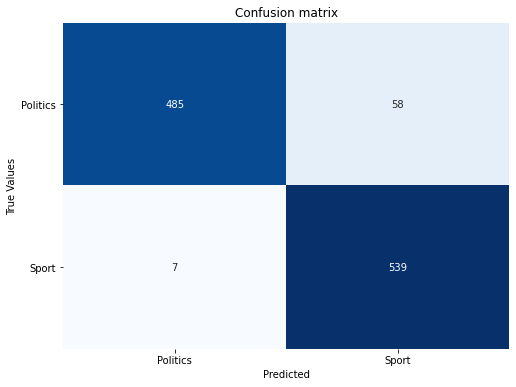

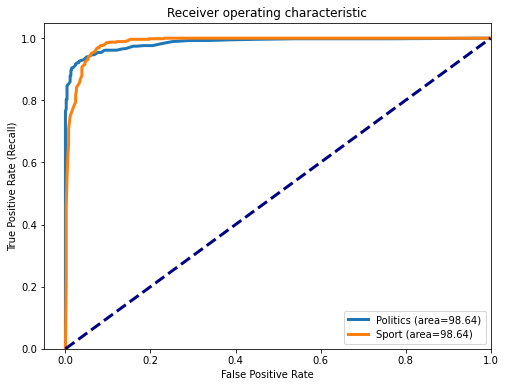

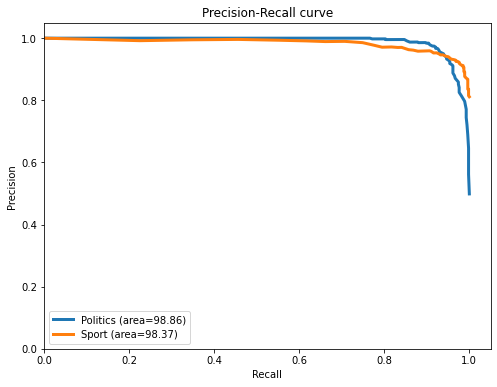

In [88]:
# Using RFC with word-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("CV-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 92.0
Auc: 97.0
Detail:
              precision    recall  f1-score   support

    Politics       0.96      0.88      0.92       543
       Sport       0.89      0.97      0.93       546

    accuracy                           0.92      1089
   macro avg       0.93      0.92      0.92      1089
weighted avg       0.93      0.92      0.92      1089



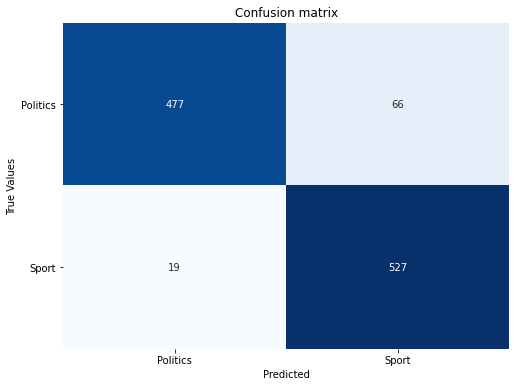

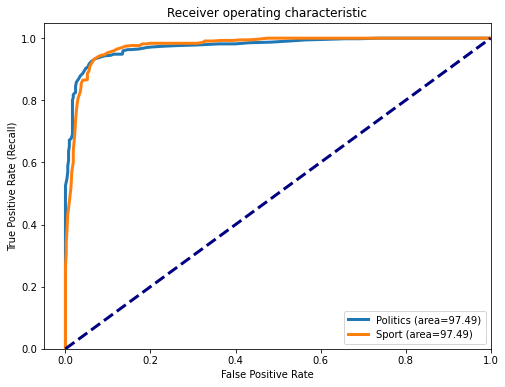

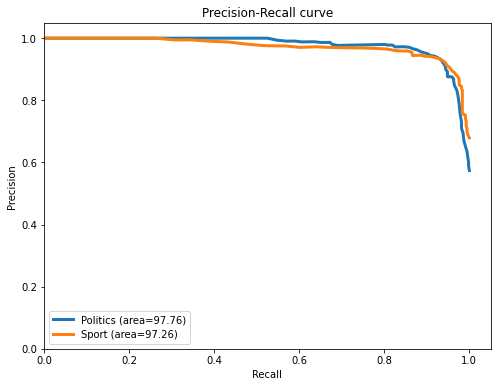

In [89]:
# Using RFC with char-ngram type count vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("CV-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.90      0.94       543
       Sport       0.91      0.99      0.95       546

    accuracy                           0.94      1089
   macro avg       0.95      0.94      0.94      1089
weighted avg       0.95      0.94      0.94      1089



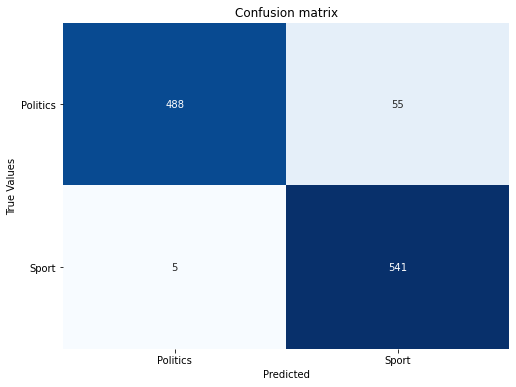

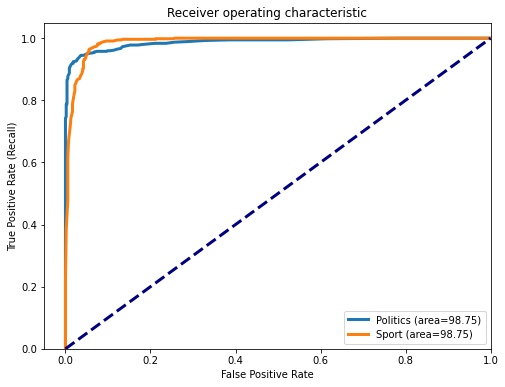

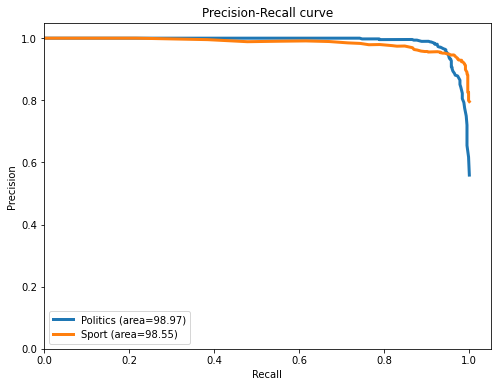

In [90]:
# Using RFC with word type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("TFIDF-word")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

Accuracy: 94.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.99      0.89      0.94       543
       Sport       0.90      0.99      0.94       546

    accuracy                           0.94      1089
   macro avg       0.94      0.94      0.94      1089
weighted avg       0.94      0.94      0.94      1089



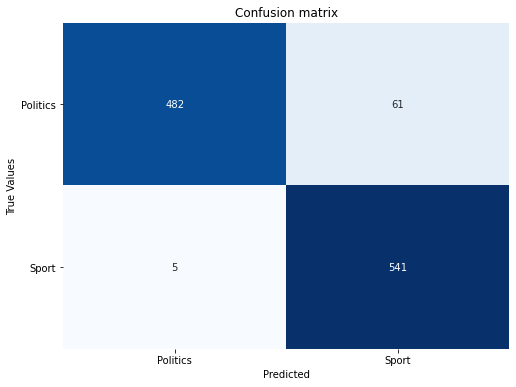

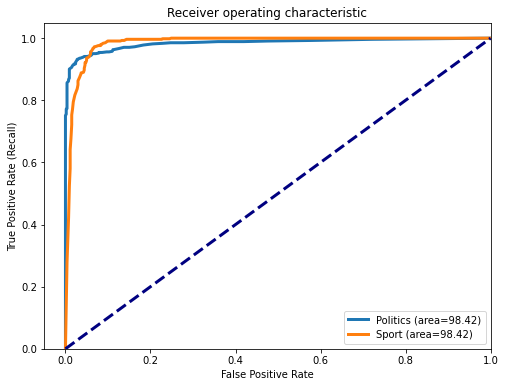

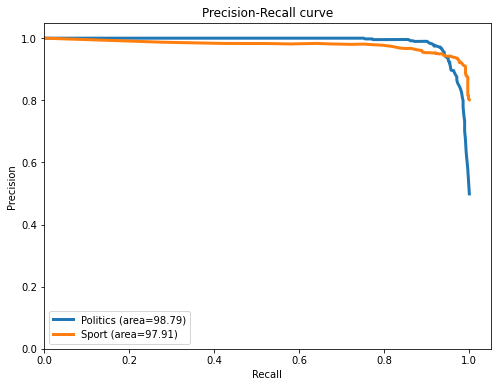

In [91]:
# Using RFC with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("TFIDF-word-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 93.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

    Politics       0.95      0.90      0.92       543
       Sport       0.90      0.95      0.93       546

    accuracy                           0.93      1089
   macro avg       0.93      0.93      0.93      1089
weighted avg       0.93      0.93      0.93      1089



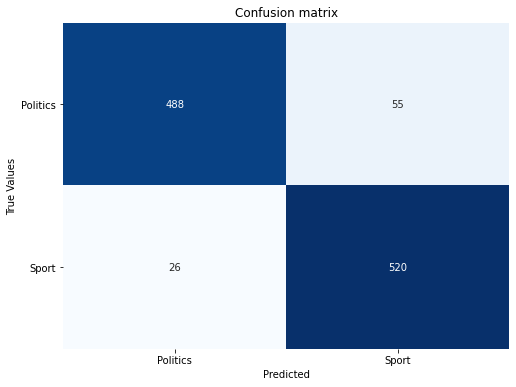

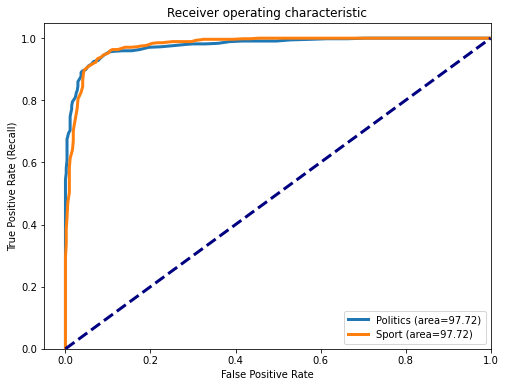

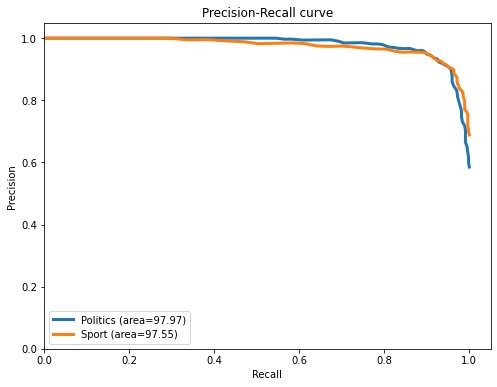

In [92]:
# Using RFC with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_sport_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_spo_pol_models.append("Random Forest Classifier")
list_spo_pol_vectorizers.append("TFIDF-char-ngram")
list_spo_pol_Accuracy.append(acc)
list_spo_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Comparing All the Models for Sport-Politics </font> </h3> </center>

In [164]:
# Creating final dataframe
final_scores_sport_pol = pd.DataFrame(list_spo_pol_models, columns = ['Models'])
final_scores_sport_pol['Vectorizers'] = list_spo_pol_vectorizers
final_scores_sport_pol['Accuracy'] = list_spo_pol_Accuracy
final_scores_sport_pol['AUC_ROC_Score'] = list_spo_pol_AUC_ROC
final_scores_sport_pol = final_scores_sport_pol.sort_values(by = 'Accuracy', ascending=False)

In [165]:
final_scores_sport_pol.reset_index(inplace=True, drop='index')
final_scores_sport_pol

Models       Vectorizers  Accuracy  AUC_ROC_Score
0    Multinomial Naive Bayes  TFIDF-word-ngram  0.977961       0.995764
1    Multinomial Naive Bayes        TFIDF-word  0.974288       0.995484
2    Multinomial Naive Bayes           CV-word  0.972452       0.995936
3    Multinomial Naive Bayes     CV-word-ngram  0.972452       0.995581
4     Support Vector Machine     CV-word-ngram  0.960514       0.993710
5     Support Vector Machine           CV-word  0.960514       0.992951
6     Support Vector Machine        TFIDF-word  0.960514       0.995740
7     Support Vector Machine  TFIDF-word-ngram  0.959596       0.995791
8     Support Vector Machine  TFIDF-char-ngram  0.946740       0.984532
9   Random Forest Classifier        TFIDF-word  0.944904       0.987525
10   Multinomial Naive Bayes  TFIDF-char-ngram  0.943067       0.984707
11  Random Forest Classifier           CV-word  0.941230       0.985667
12  Random Forest Classifier     CV-word-ngram  0.940312       0.986367
13  Random Forest Classifier  TFIDF-word-ngram  0.939394       0.984248
14   Multinomial Naive Bayes     CV-char-ngram  0.938476       0.980580
15  Random Forest Classifier  TFIDF-char-ngram  0.925620       0.977199
16  Random Forest Classifier     CV-char-ngram  0.921947       0.974904
17    Support Vector Machine     CV-char-ngram  0.848485       0.976904

In [166]:
fig = px.bar(final_scores_sport_pol, x="Accuracy", color="Vectorizers",
             y='Models',
             barmode='group',
             height=600, text=round(final_scores_sport_pol['Accuracy']* 100,2), orientation='h'
            )
fig.update_layout(title={'text': f"Comparison of Models based on Accuracy for Sport-Politics Categories", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Accuracy", yaxis_title="Models")
fig.show()

<center><h3> <font color='blue'> Evaluation Discussions for Sport-Politics Category </font> </h3> </center>


<ul>
    <li><p style="text-align:justify;"><b> As we can see from the comparisons graph above for the Sport-Politics Category, the picture is evident enough to elaborate each and everything, even by hovering over it we can get a conspicuous understanding.</b></p></li>
    <li><p style="text-align:justify;"><b> After implementing each vectorizer-model combination, we see that the Multinomial Naive Bayes with TFIDF Vectorizer word-ngram parameters has given the highest accuracy of 97.80% along with an ROC of 99.57%, which is outstanding for any classification algorithm.</b></p></li>
     <li><p style="text-align:justify;"><b> We can also see that the character-ngram vectorizers are having the lowest score among all the vectorizers used.</b></p></li>
    <li><p style="text-align:justify;"><b> Multinomial NB is showing nearly excellent results for all vectorisers, whereas the ensemble technique Random Forest Classifier has the weakest overall performance for all the vectorisers.</b></p></li>
    <li><p style="text-align:justify;"><b> We can thus infer that probability-based machine learning models could be best for the Sport-Politics Category, while we could refrain from using other ensemble techniques for this type of problem.</b></p></li>
</ul>

***

<center><h2> <font color='green'> Unique Pair (Music, Politics) </font> </h2> </center>

In [96]:
#Defining the lists to store all the scores to compare in the end
list_music_pol_AUC_ROC = []
list_music_pol_Accuracy = []
list_music_pol_models = []
list_music_pol_vectorizers = []

In [97]:
df_music_pol = df[(df['label'] == 'Music') | (df['label'] == 'Politics')]
df_music_pol['label'].value_counts()

Politics    1808
Music       1797
Name: label, dtype: int64

<center><h3> <font color='blue'> Support Vector Machine </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      0.98      0.96       539
    Politics       0.98      0.93      0.96       543

    accuracy                           0.96      1082
   macro avg       0.96      0.96      0.96      1082
weighted avg       0.96      0.96      0.96      1082



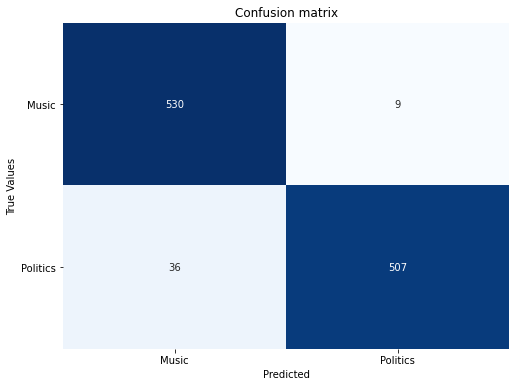

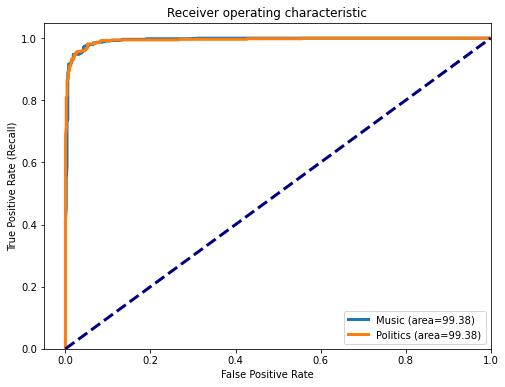

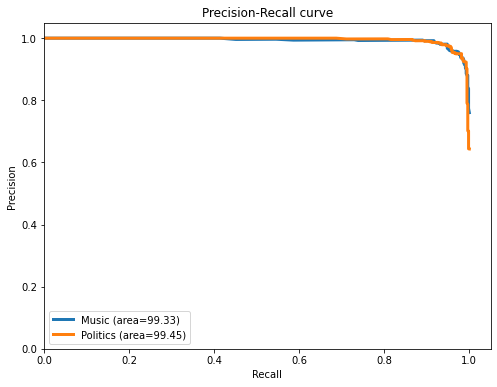

In [98]:
# Using SVM with word type count vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("CV-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      0.97      0.95       539
    Politics       0.97      0.94      0.95       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



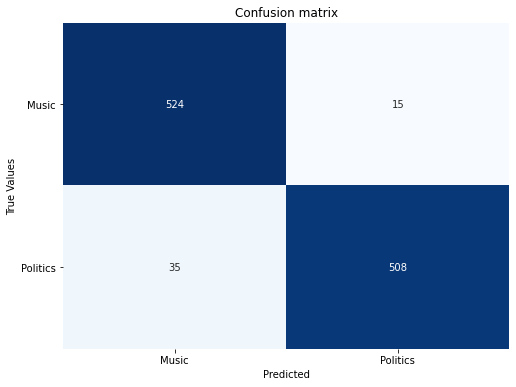

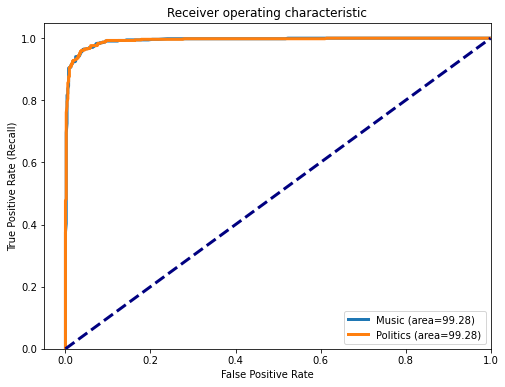

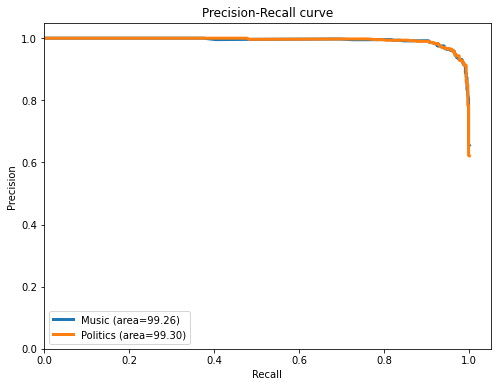

In [99]:
# Using SVM with word-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("CV-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.92      0.96      0.94       539
    Politics       0.96      0.91      0.93       543

    accuracy                           0.94      1082
   macro avg       0.94      0.94      0.94      1082
weighted avg       0.94      0.94      0.94      1082



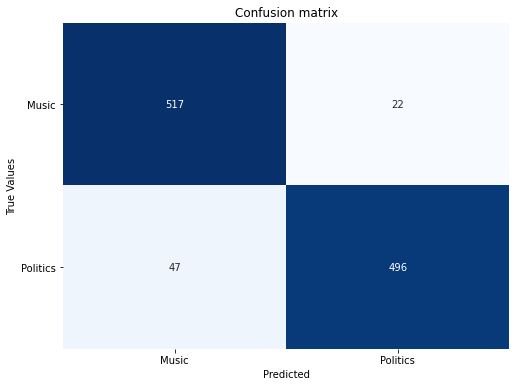

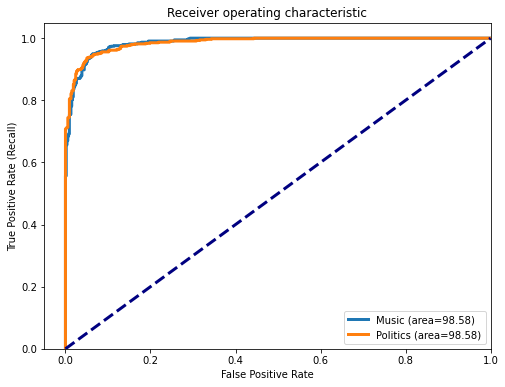

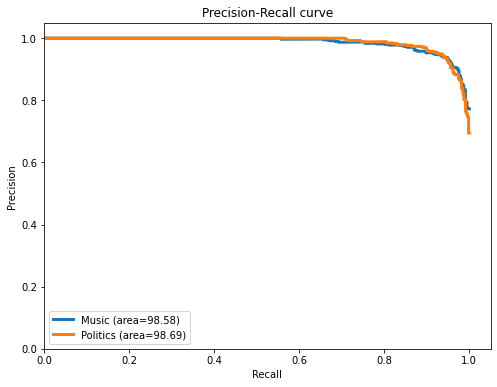

In [100]:
# Using SVM with char-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("CV-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.93      1.00      0.96       539
    Politics       1.00      0.92      0.96       543

    accuracy                           0.96      1082
   macro avg       0.96      0.96      0.96      1082
weighted avg       0.96      0.96      0.96      1082



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



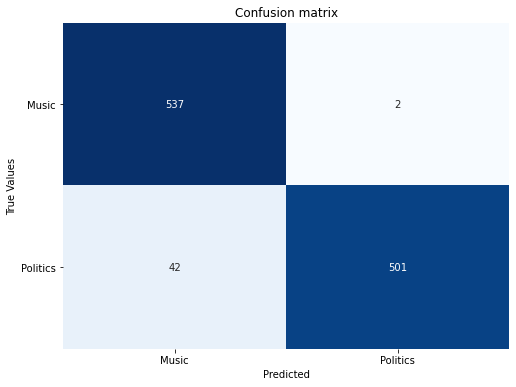

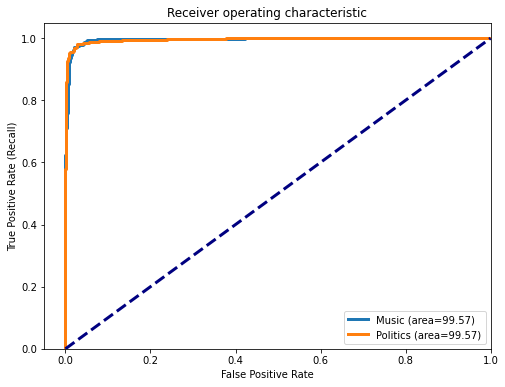

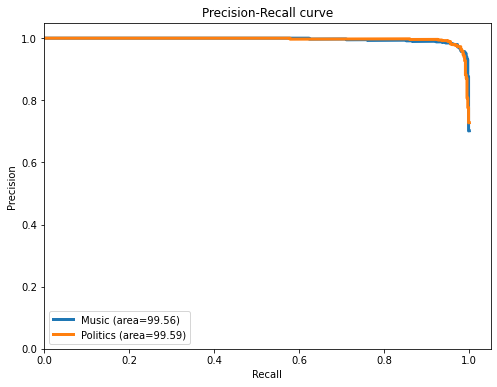

In [101]:
# Using SVM with word type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("TFIDF-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      1.00      0.96       539
    Politics       1.00      0.93      0.96       543

    accuracy                           0.96      1082
   macro avg       0.97      0.96      0.96      1082
weighted avg       0.97      0.96      0.96      1082



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



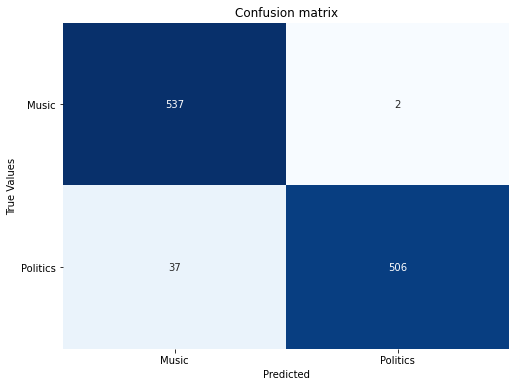

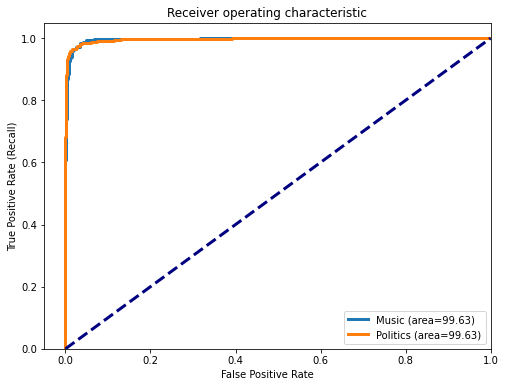

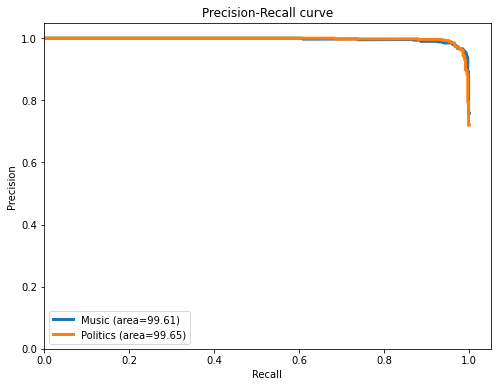

In [102]:
# Using SVM with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("TFIDF-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.96      0.95       539
    Politics       0.96      0.94      0.95       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



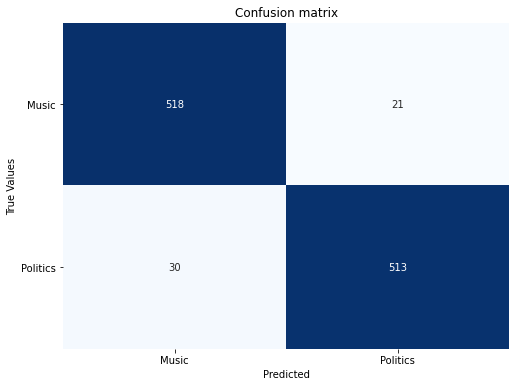

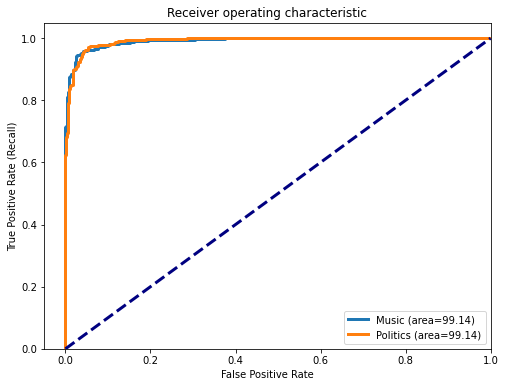

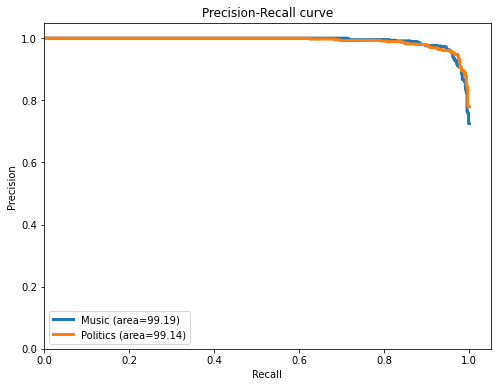

In [103]:
# Using SVM with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Support Vector Machine")
list_music_pol_vectorizers.append("TFIDF-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Multinomial Naive Bayes </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.98      0.96      0.97       539
    Politics       0.97      0.98      0.97       543

    accuracy                           0.97      1082
   macro avg       0.97      0.97      0.97      1082
weighted avg       0.97      0.97      0.97      1082



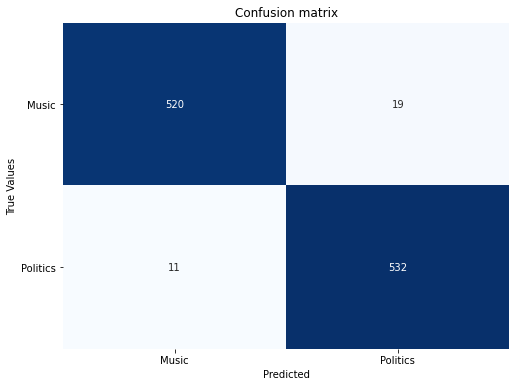

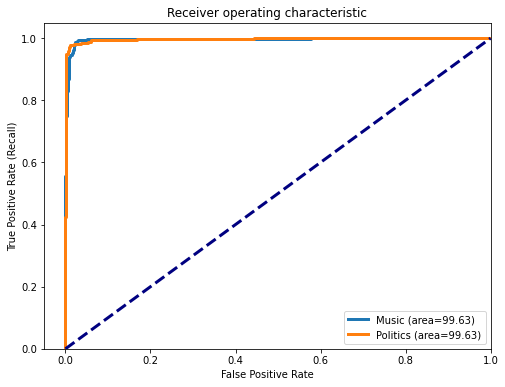

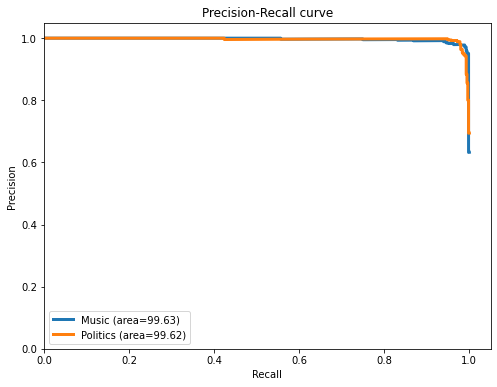

In [104]:
# Using NB with word type count vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("CV-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 98.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.97      0.99      0.98       539
    Politics       0.99      0.97      0.98       543

    accuracy                           0.98      1082
   macro avg       0.98      0.98      0.98      1082
weighted avg       0.98      0.98      0.98      1082



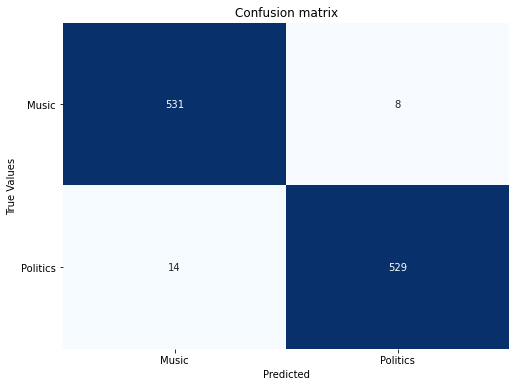

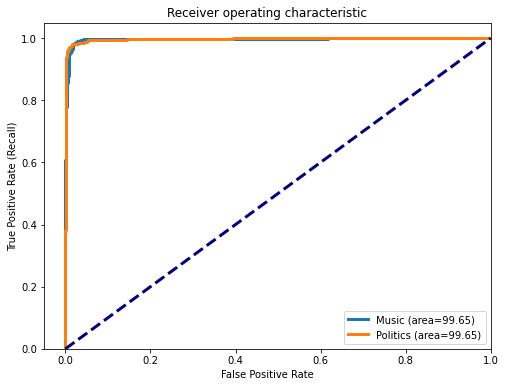

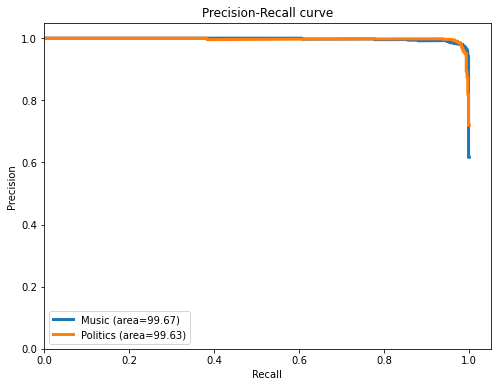

In [105]:
# Using NB with word-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("CV-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.92      0.97      0.95       539
    Politics       0.97      0.92      0.94       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



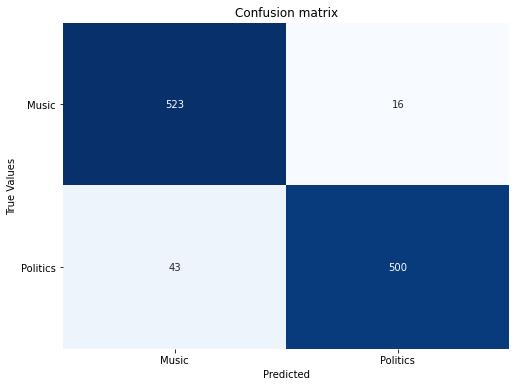

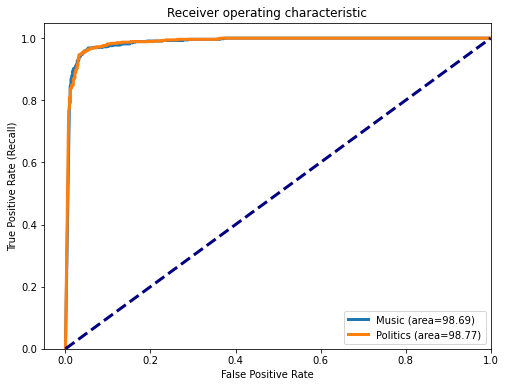

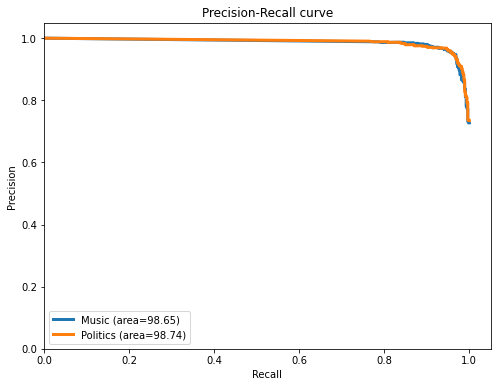

In [106]:
# Using NB with char-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("CV-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 97.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.98      0.96      0.97       539
    Politics       0.96      0.98      0.97       543

    accuracy                           0.97      1082
   macro avg       0.97      0.97      0.97      1082
weighted avg       0.97      0.97      0.97      1082



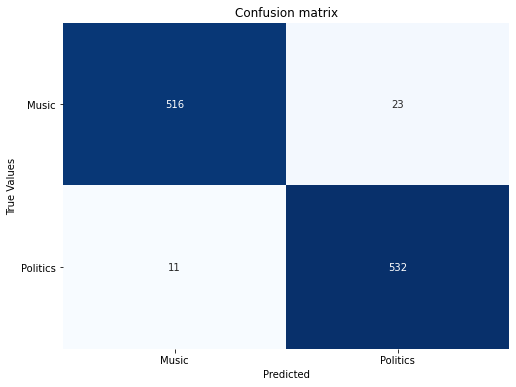

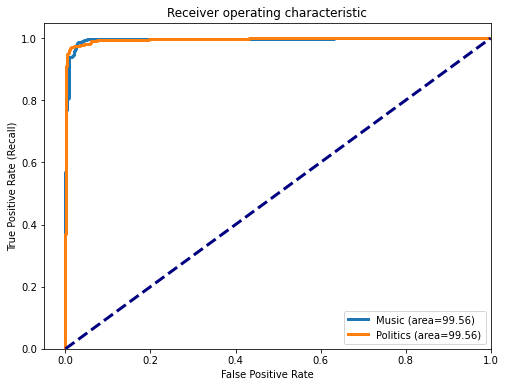

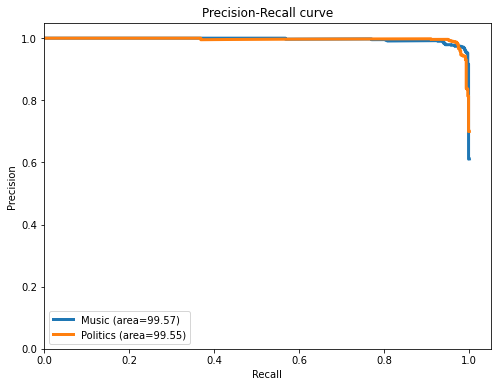

In [107]:
# Using NB with word type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("TFIDF-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 98.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.97      0.98      0.98       539
    Politics       0.98      0.97      0.98       543

    accuracy                           0.98      1082
   macro avg       0.98      0.98      0.98      1082
weighted avg       0.98      0.98      0.98      1082



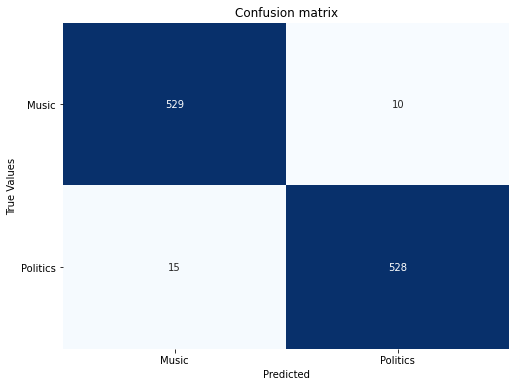

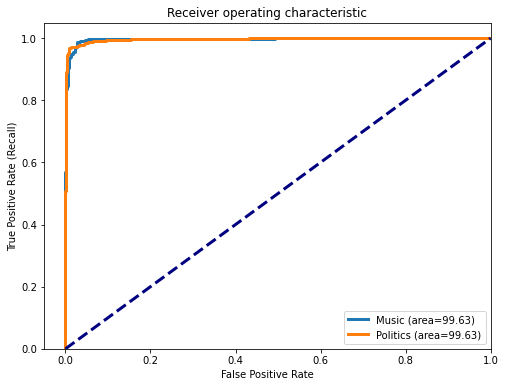

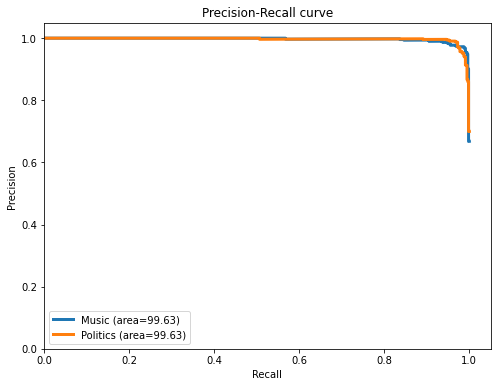

In [108]:
# Using NB with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("TFIDF-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.95      0.95       539
    Politics       0.95      0.96      0.96       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



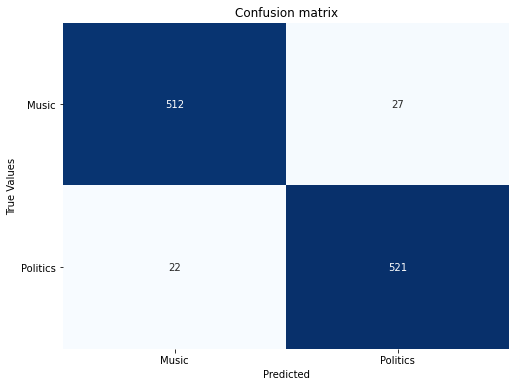

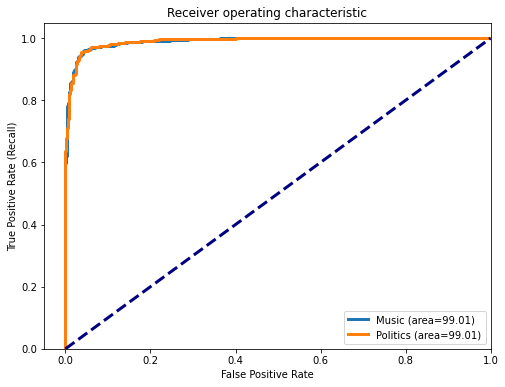

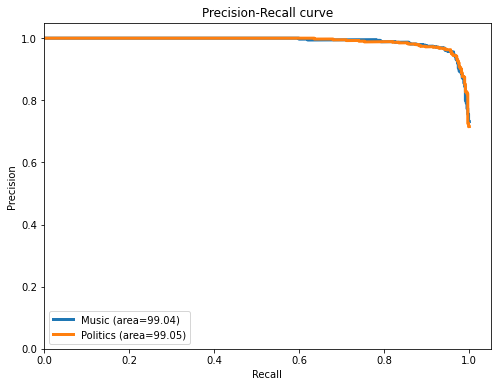

In [109]:
# Using NB with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Multinomial Naive Bayes")
list_music_pol_vectorizers.append("TFIDF-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Random Forest Classifier </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.91      0.99      0.95       539
    Politics       0.99      0.91      0.95       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



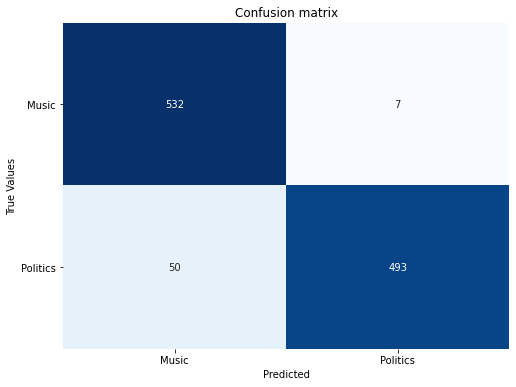

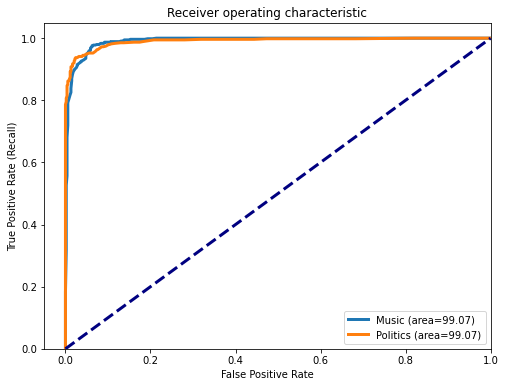

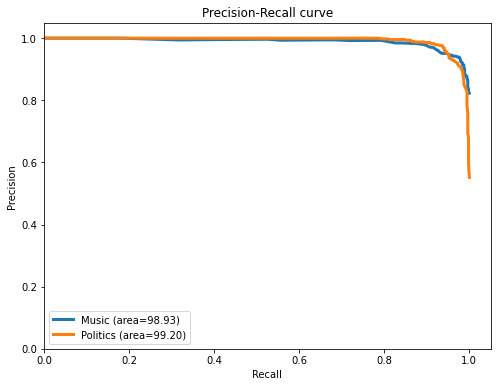

In [110]:
# Using RFC with word type count vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("CV-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.91      0.99      0.95       539
    Politics       0.99      0.90      0.94       543

    accuracy                           0.95      1082
   macro avg       0.95      0.95      0.95      1082
weighted avg       0.95      0.95      0.95      1082



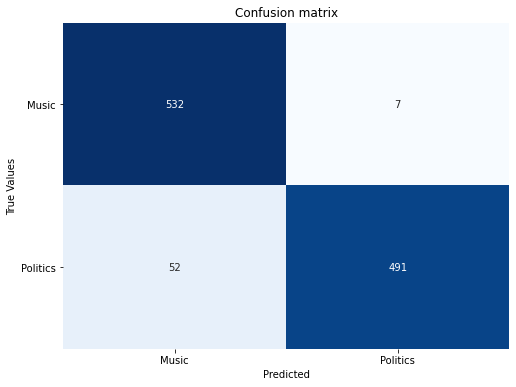

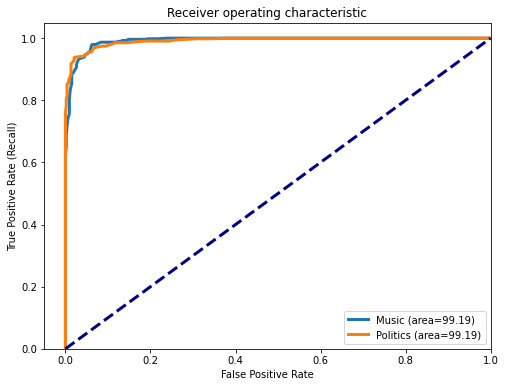

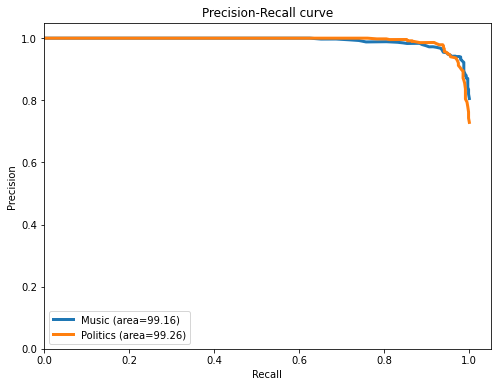

In [111]:
# Using RFC with word-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("CV-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 93.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.91      0.95      0.93       539
    Politics       0.95      0.91      0.93       543

    accuracy                           0.93      1082
   macro avg       0.93      0.93      0.93      1082
weighted avg       0.93      0.93      0.93      1082



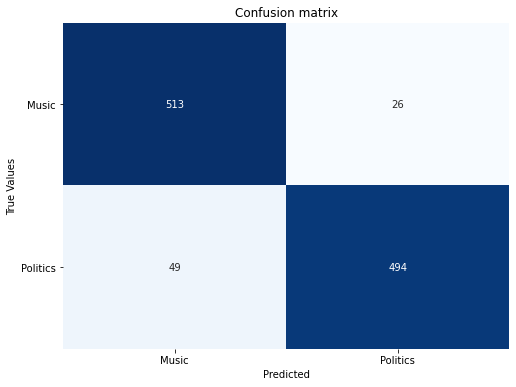

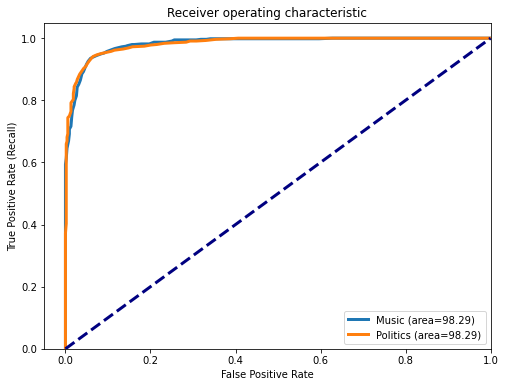

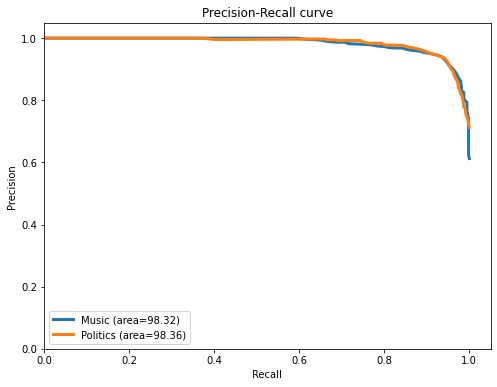

In [112]:
# Using RFC with char-ngram type count vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("CV-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.90      0.99      0.94       539
    Politics       0.99      0.90      0.94       543

    accuracy                           0.94      1082
   macro avg       0.95      0.94      0.94      1082
weighted avg       0.95      0.94      0.94      1082



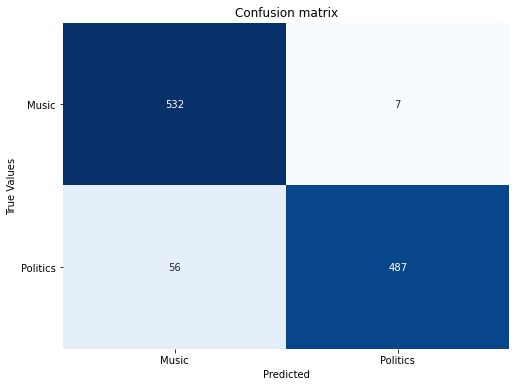

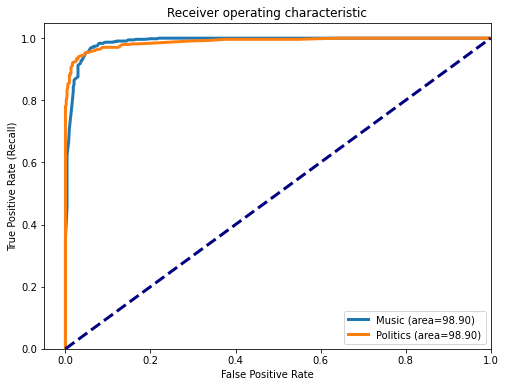

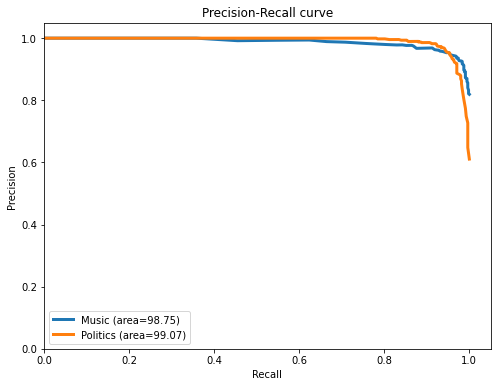

In [113]:
# Using RFC with word type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("TFIDF-word")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.90      0.99      0.94       539
    Politics       0.99      0.89      0.94       543

    accuracy                           0.94      1082
   macro avg       0.94      0.94      0.94      1082
weighted avg       0.94      0.94      0.94      1082



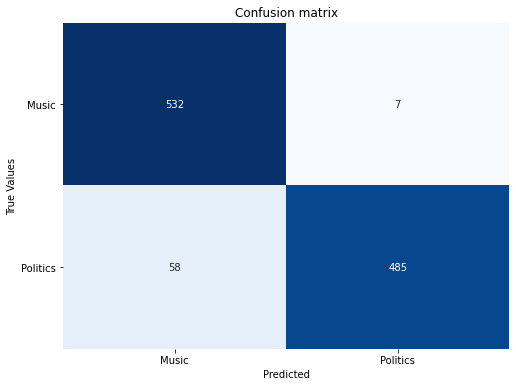

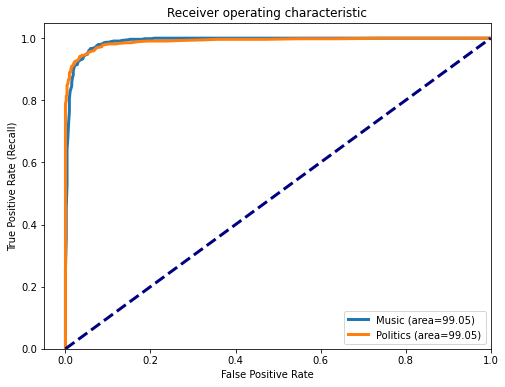

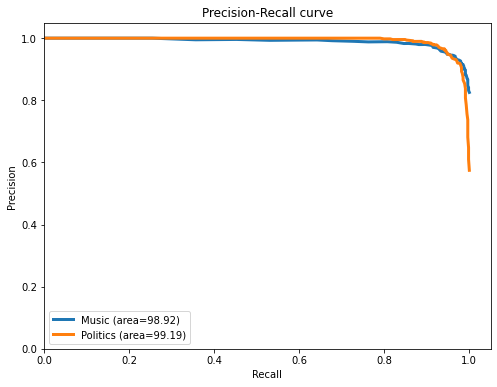

In [114]:
# Using RFC with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("TFIDF-word-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 93.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.92      0.95      0.93       539
    Politics       0.95      0.92      0.93       543

    accuracy                           0.93      1082
   macro avg       0.93      0.93      0.93      1082
weighted avg       0.93      0.93      0.93      1082



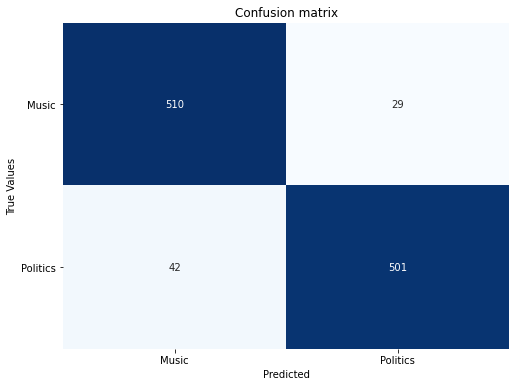

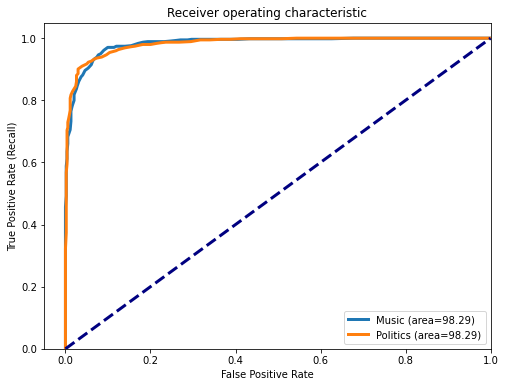

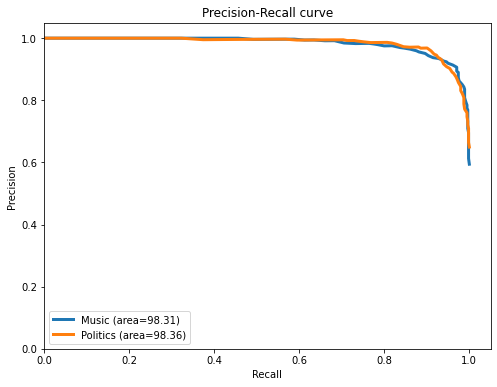

In [115]:
# Using RFC with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_music_pol, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_music_pol_models.append("Random Forest Classifier")
list_music_pol_vectorizers.append("TFIDF-char-ngram")
list_music_pol_Accuracy.append(acc)
list_music_pol_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Comparing All the Models for Music-Politics </font> </h3> </center>

In [116]:
# Creating final dataframe
final_scores_music_pol = pd.DataFrame(list_music_pol_models, columns = ['Models'])
final_scores_music_pol['Vectorizers'] = list_music_pol_vectorizers
final_scores_music_pol['Accuracy'] = list_music_pol_Accuracy
final_scores_music_pol['AUC_ROC_Score'] = list_music_pol_AUC_ROC
final_scores_music_pol = final_scores_music_pol.sort_values(by = 'Accuracy', ascending=False)

In [117]:
final_scores_music_pol.reset_index(inplace=True, drop='index')
final_scores_music_pol

Models       Vectorizers  Accuracy  AUC_ROC_Score
0    Multinomial Naive Bayes     CV-word-ngram  0.979667       0.996546
1    Multinomial Naive Bayes  TFIDF-word-ngram  0.976895       0.996279
2    Multinomial Naive Bayes           CV-word  0.972274       0.996289
3    Multinomial Naive Bayes        TFIDF-word  0.968577       0.995647
4     Support Vector Machine  TFIDF-word-ngram  0.963956       0.996262
5     Support Vector Machine        TFIDF-word  0.959335       0.995681
6     Support Vector Machine           CV-word  0.958410       0.993822
7    Multinomial Naive Bayes  TFIDF-char-ngram  0.954713       0.990143
8     Support Vector Machine     CV-word-ngram  0.953789       0.992782
9     Support Vector Machine  TFIDF-char-ngram  0.952865       0.991390
10  Random Forest Classifier           CV-word  0.947320       0.990718
11   Multinomial Naive Bayes     CV-char-ngram  0.945471       0.987274
12  Random Forest Classifier     CV-word-ngram  0.945471       0.991882
13  Random Forest Classifier        TFIDF-word  0.941774       0.988983
14  Random Forest Classifier  TFIDF-word-ngram  0.939926       0.990519
15    Support Vector Machine     CV-char-ngram  0.936229       0.985815
16  Random Forest Classifier  TFIDF-char-ngram  0.934381       0.982913
17  Random Forest Classifier     CV-char-ngram  0.930684       0.982862

In [118]:
fig = px.bar(final_scores_music_pol, x="Accuracy", color="Vectorizers",
             y='Models',
             barmode='group',
             height=600, text=round(final_scores_music_pol['Accuracy']* 100,2), orientation='h'
            )
fig.update_layout(title={'text': f"Comparison of Models based on Accuracy for Music-Politics Categories", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Accuracy", yaxis_title="Models")
fig.show()

<center><h3> <font color='blue'> Evaluation Discussions for Music-Politics Category </font> </h3> </center>


<ul>
    <li><p style="text-align:justify;"><b> As we can see from the comparisons graph above for the Music-Politics Category, the picture is evident enough to elaborate each and everything, even by hovering over it we can get a conspicuous understanding.</b></p></li>
    <li><p style="text-align:justify;"><b> After implementing each vectorizer-model combination, we see that the Multinomial Naive Bayes with Count Vectorizer word-ngram parameters has given the highest accuracy of 97.97% along with an ROC of 99.65%, which is outstanding for any classification algorithm.</b></p></li>
     <li><p style="text-align:justify;"><b> We can also see that the character-ngram vectorizers are having relatively low score among all the vectorizers used.</b></p></li>
    <li><p style="text-align:justify;"><b> Multinomial NB is showing nearly excellent results for all vectorisers, whereas the ensemble technique Random Forest Classifier has the weakest overall performance for all the vectorisers.</b></p></li>
    <li><p style="text-align:justify;"><b> We can thus infer that probability-based machine learning models could be best for the Music-Politics Category, while we could refrain from using other ensemble techniques for this type of problem.</b></p></li>
</ul>

***

***

> ## TASK 3. Multi-class Text Classification:

<h3 style="text-align:justify;"><b><font color='red'> 
1. Using all three categories (A,B,C) that you have selected:
i) Apply appropriate preprocessing steps to create a numeric representation
of the documents for these three categories, suitable for classification.
ii) Train a classification model using a multi-class classifier of your choice,
which can distinguish documents from the categories A, B, and C.
iii) Test the predictions of the classification model using an appropriate
evaluation strategy. Report and discuss the evaluation results.
    </font></b></h3>

***

In [119]:
#Defining the lists to store all the scores to compare in the end
list_multi_AUC_ROC = []
list_multi_Accuracy = []
list_multi_models = []
list_multi_vectorizers = []

In [120]:
df_multi = df.copy()
df_multi['label'].value_counts()

Sport       1819
Politics    1808
Music       1797
Name: label, dtype: int64

<center><h3> <font color='blue'> Support Vector Machine </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.94      0.94      0.94       539
    Politics       0.96      0.94      0.95       543
       Sport       0.92      0.95      0.94       546

    accuracy                           0.94      1628
   macro avg       0.94      0.94      0.94      1628
weighted avg       0.94      0.94      0.94      1628



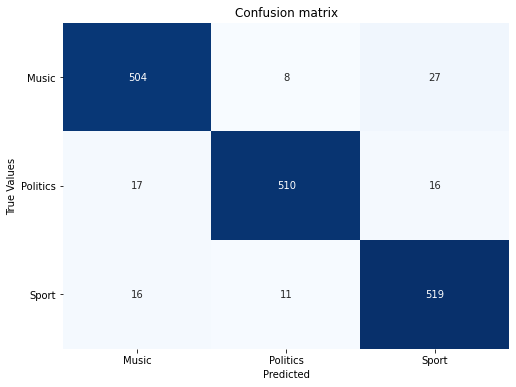

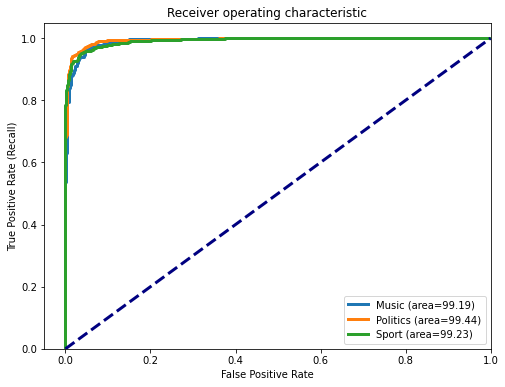

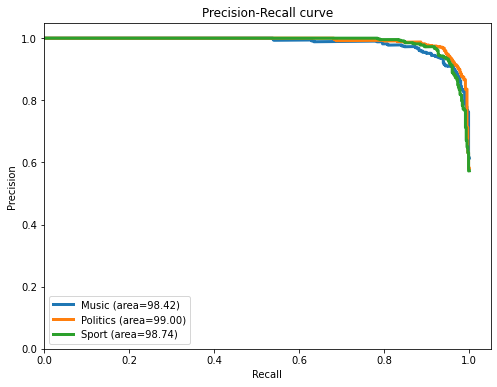

In [121]:
# Using SVM with word type count vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("CV-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 94.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.93      0.93      0.93       539
    Politics       0.97      0.94      0.95       543
       Sport       0.92      0.94      0.93       546

    accuracy                           0.94      1628
   macro avg       0.94      0.94      0.94      1628
weighted avg       0.94      0.94      0.94      1628



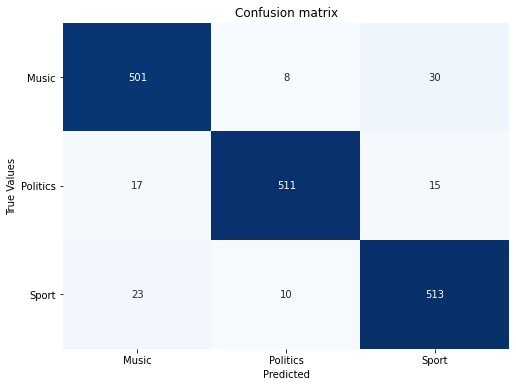

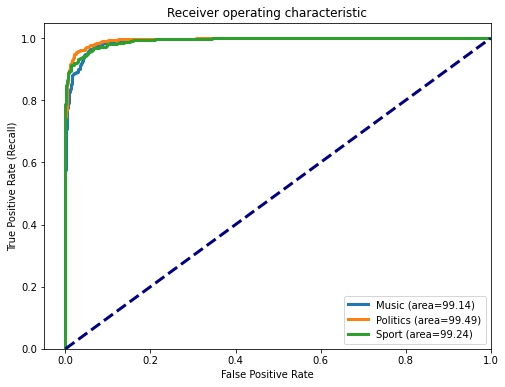

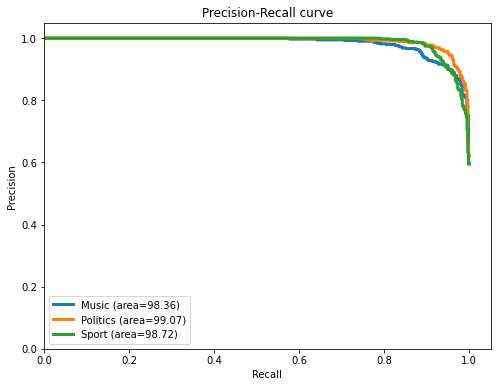

In [122]:
# Using SVM with word-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("CV-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 88.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.90      0.87      0.89       539
    Politics       0.83      0.96      0.89       543
       Sport       0.93      0.81      0.86       546

    accuracy                           0.88      1628
   macro avg       0.88      0.88      0.88      1628
weighted avg       0.88      0.88      0.88      1628



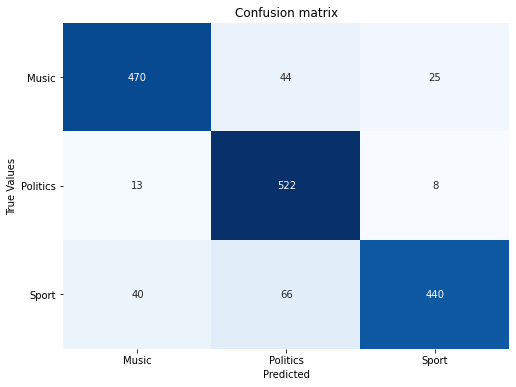

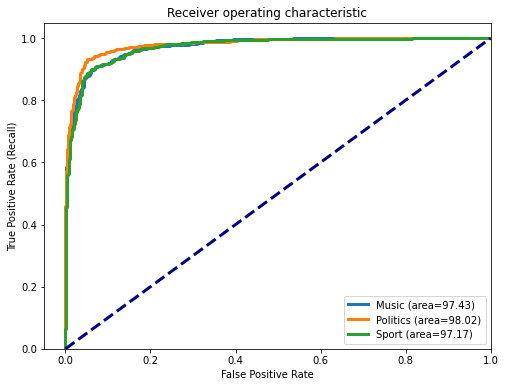

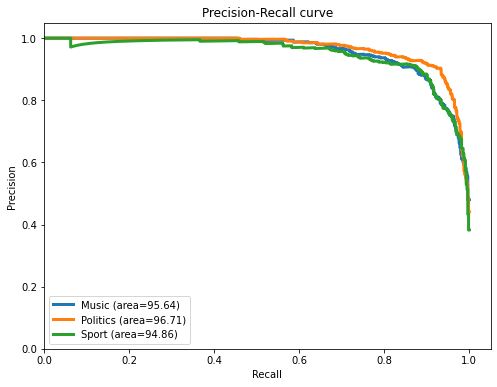

In [123]:
# Using SVM with char-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("CV-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 95.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.94      0.95       539
    Politics       0.95      0.95      0.95       543
       Sport       0.94      0.95      0.95       546

    accuracy                           0.95      1628
   macro avg       0.95      0.95      0.95      1628
weighted avg       0.95      0.95      0.95      1628



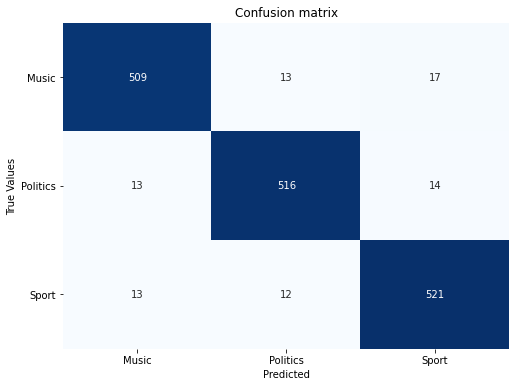

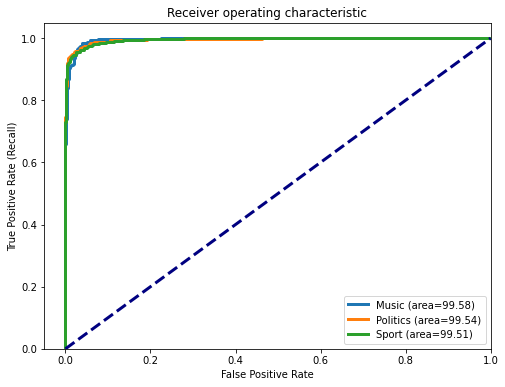

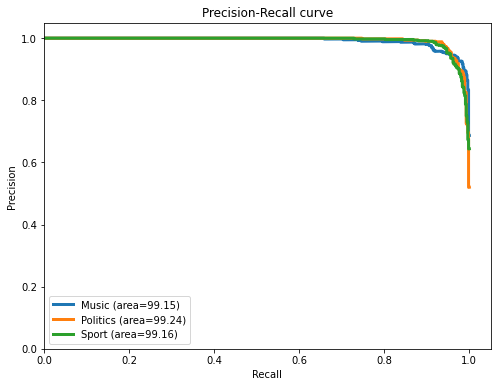

In [124]:
# Using SVM with word type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("TFIDF-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 95.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.96      0.95       539
    Politics       0.97      0.95      0.96       543
       Sport       0.95      0.96      0.95       546

    accuracy                           0.95      1628
   macro avg       0.95      0.95      0.95      1628
weighted avg       0.95      0.95      0.95      1628



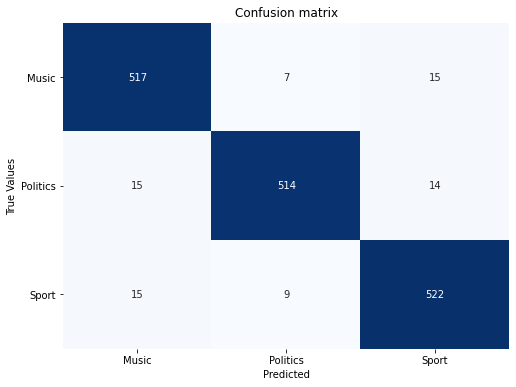

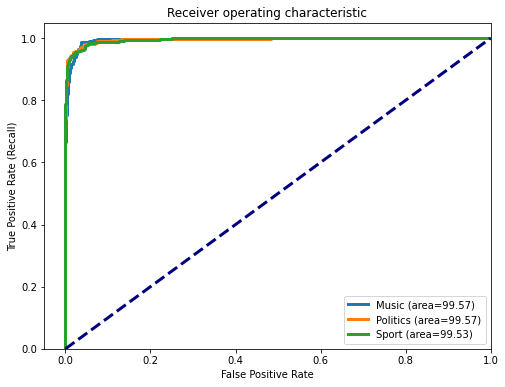

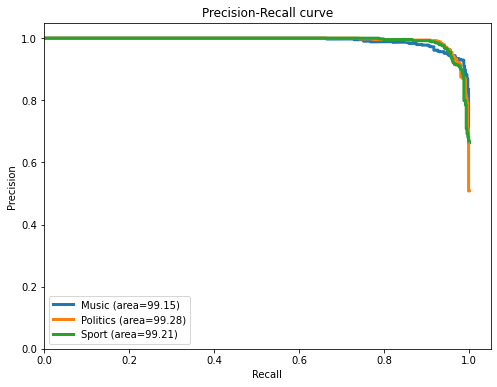

In [125]:
# Using SVM with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("TFIDF-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Accuracy: 90.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.90      0.91      0.90       539
    Politics       0.86      0.94      0.90       543
       Sport       0.93      0.84      0.88       546

    accuracy                           0.90      1628
   macro avg       0.90      0.90      0.90      1628
weighted avg       0.90      0.90      0.90      1628



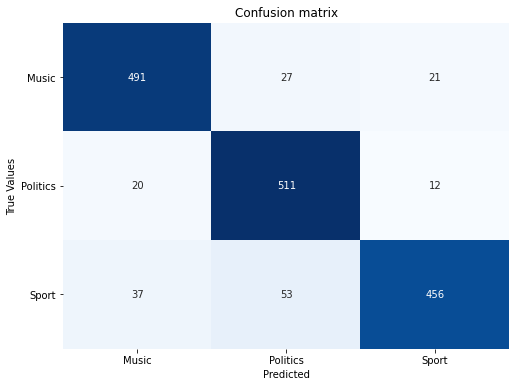

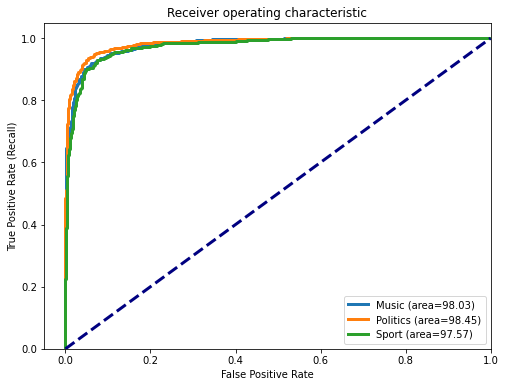

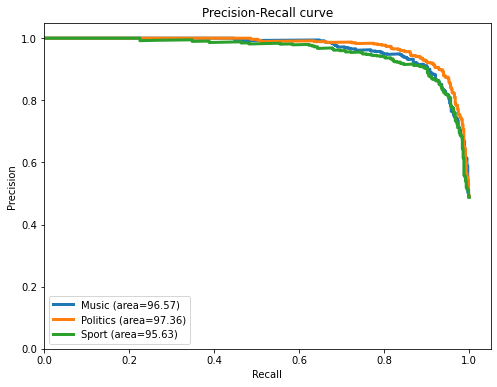

In [126]:
# Using SVM with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="SVM", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Support Vector Machine")
list_multi_vectorizers.append("TFIDF-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Multinomial Naive Bayes </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.95      0.95       539
    Politics       0.96      0.97      0.96       543
       Sport       0.96      0.95      0.96       546

    accuracy                           0.96      1628
   macro avg       0.96      0.96      0.96      1628
weighted avg       0.96      0.96      0.96      1628



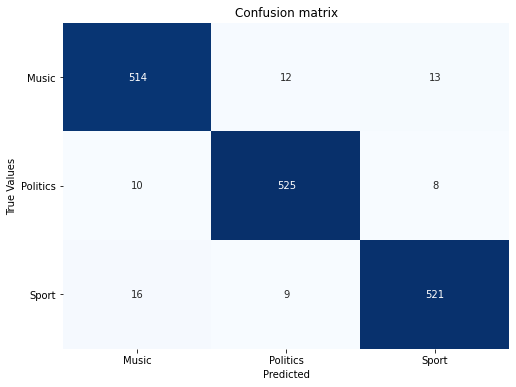

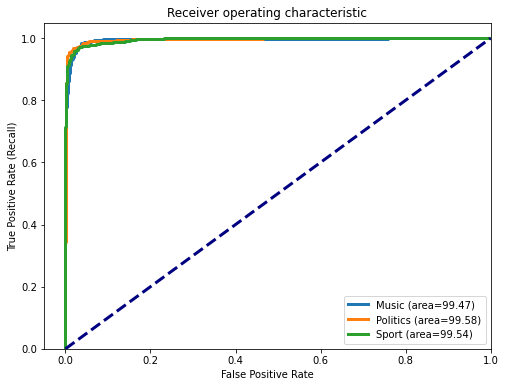

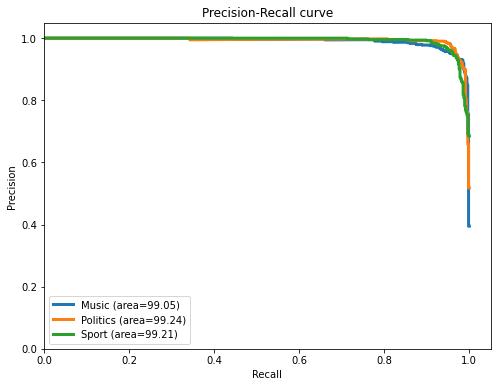

In [127]:
# Using NB with word type count vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("CV-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 96.0
Auc: 100.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.97      0.96       539
    Politics       0.98      0.95      0.97       543
       Sport       0.96      0.96      0.96       546

    accuracy                           0.96      1628
   macro avg       0.96      0.96      0.96      1628
weighted avg       0.96      0.96      0.96      1628



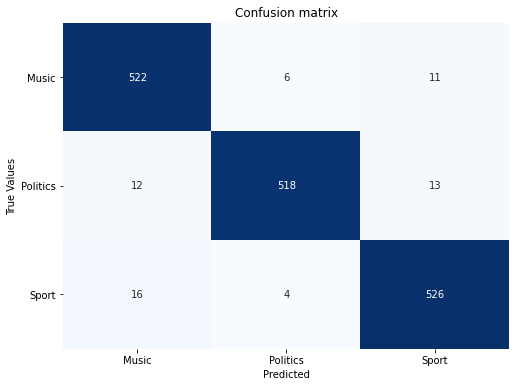

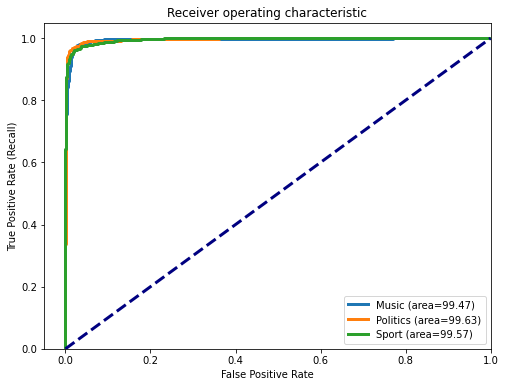

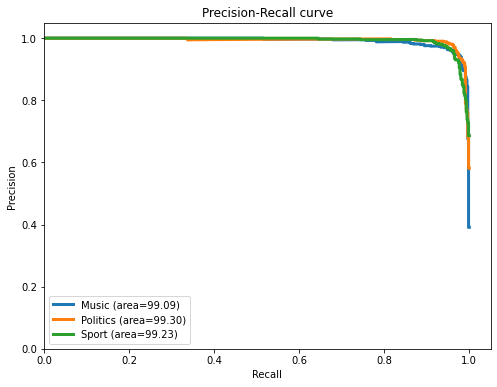

In [128]:
# Using NB with word-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("CV-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 90.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.89      0.92      0.90       539
    Politics       0.92      0.89      0.91       543
       Sport       0.89      0.89      0.89       546

    accuracy                           0.90      1628
   macro avg       0.90      0.90      0.90      1628
weighted avg       0.90      0.90      0.90      1628



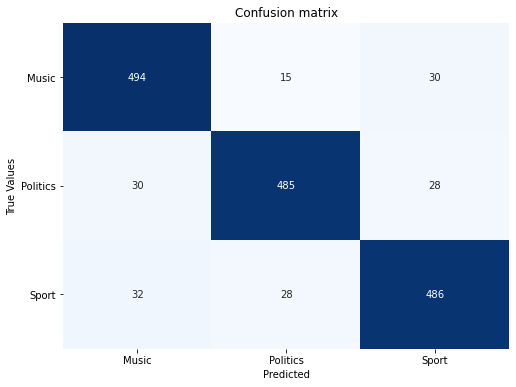

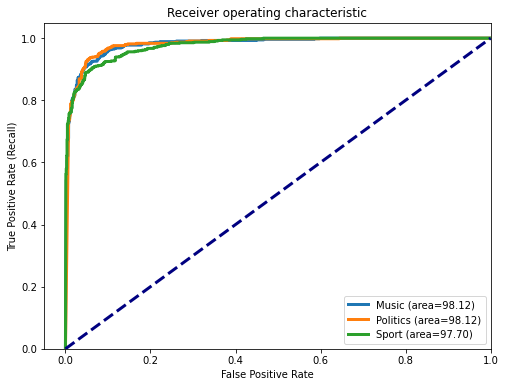

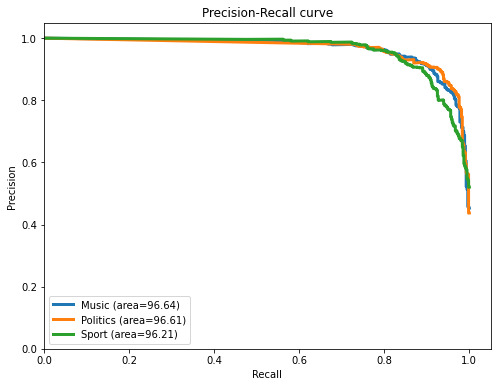

In [129]:
# Using NB with char-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("CV-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 95.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.94      0.94       539
    Politics       0.94      0.97      0.95       543
       Sport       0.96      0.94      0.95       546

    accuracy                           0.95      1628
   macro avg       0.95      0.95      0.95      1628
weighted avg       0.95      0.95      0.95      1628



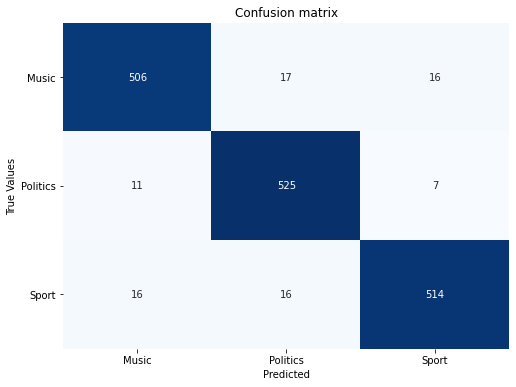

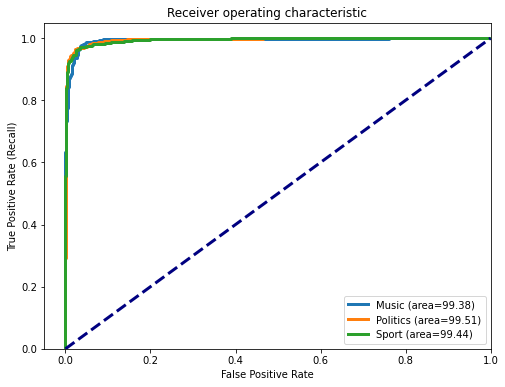

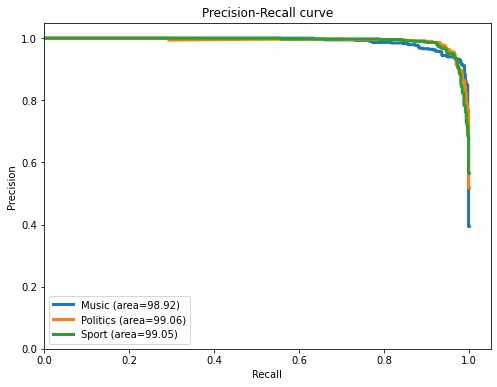

In [130]:
# Using NB with word type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("TFIDF-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 96.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.95      0.96      0.95       539
    Politics       0.97      0.96      0.96       543
       Sport       0.96      0.96      0.96       546

    accuracy                           0.96      1628
   macro avg       0.96      0.96      0.96      1628
weighted avg       0.96      0.96      0.96      1628



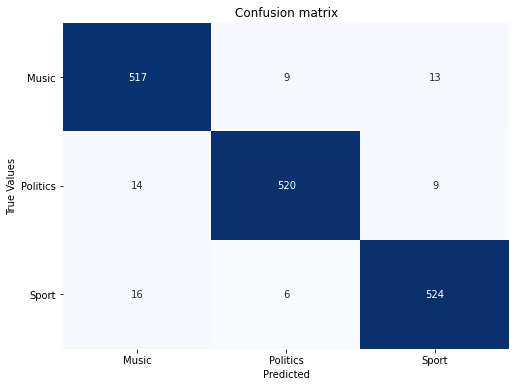

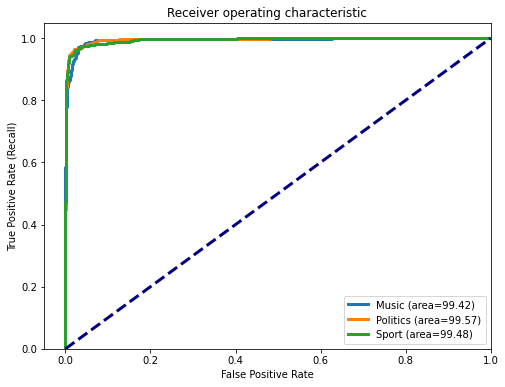

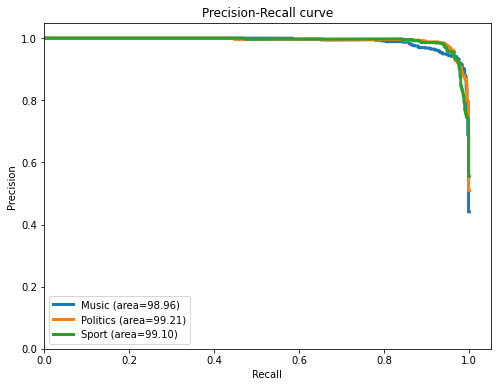

In [131]:
# Using NB with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("TFIDF-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy: 90.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.93      0.89      0.91       539
    Politics       0.89      0.93      0.91       543
       Sport       0.89      0.89      0.89       546

    accuracy                           0.90      1628
   macro avg       0.90      0.90      0.90      1628
weighted avg       0.90      0.90      0.90      1628



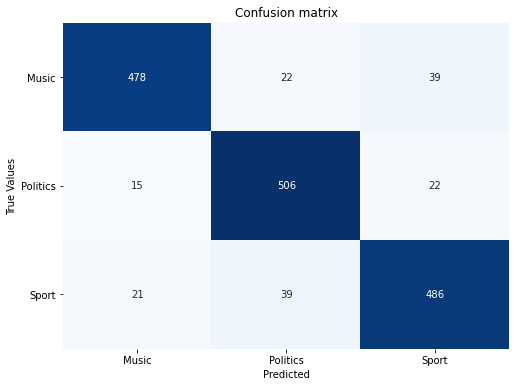

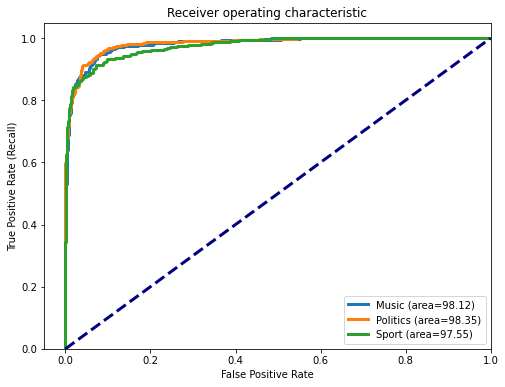

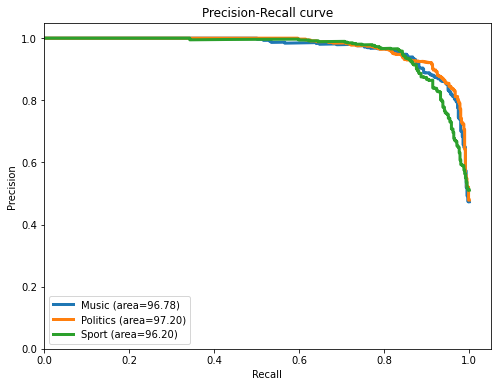

In [132]:
# Using NB with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="NB", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Multinomial Naive Bayes")
list_multi_vectorizers.append("TFIDF-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Random Forest Classifier </font> </h3> </center>

<h3> <font color='purple'> Using Count Vectorizer: </font> </h3>

Accuracy: 90.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.83      0.89       539
    Politics       0.97      0.89      0.93       543
       Sport       0.79      0.97      0.87       546

    accuracy                           0.90      1628
   macro avg       0.91      0.90      0.90      1628
weighted avg       0.91      0.90      0.90      1628



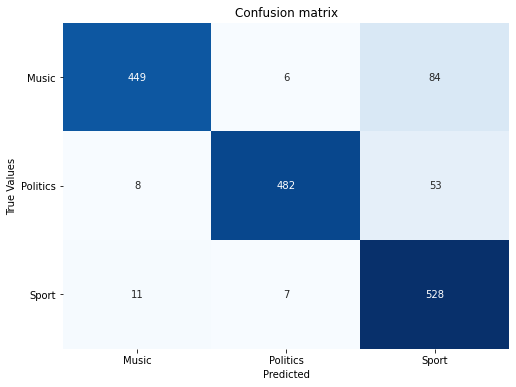

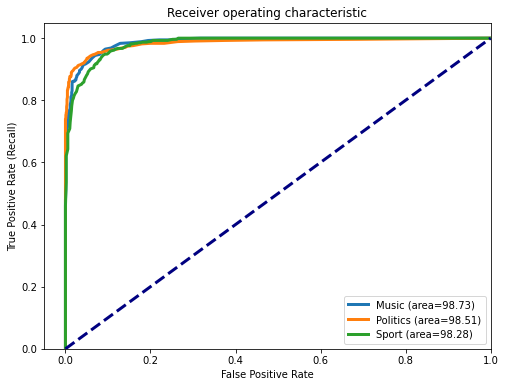

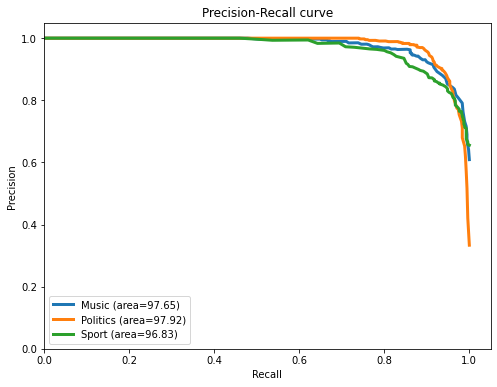

In [133]:
# Using RFC with word type count vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("CV-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

Accuracy: 89.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.81      0.88       539
    Politics       0.97      0.88      0.93       543
       Sport       0.78      0.97      0.86       546

    accuracy                           0.89      1628
   macro avg       0.90      0.89      0.89      1628
weighted avg       0.90      0.89      0.89      1628



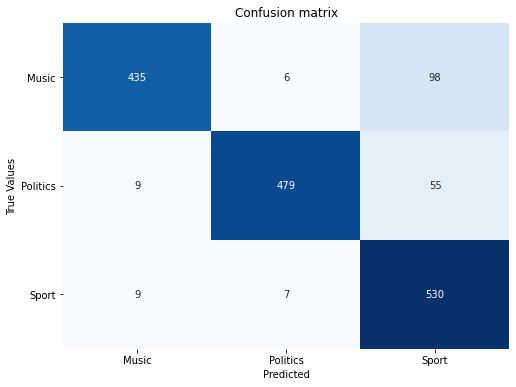

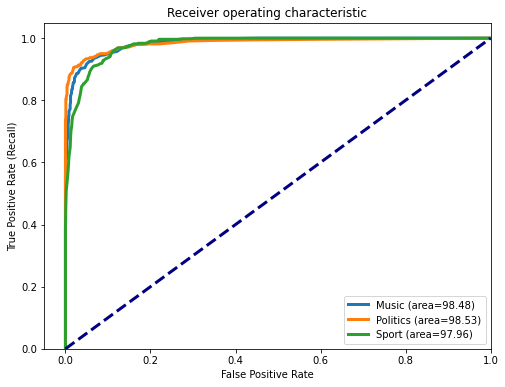

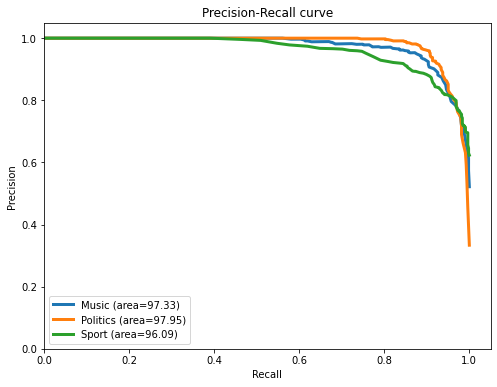

In [134]:
# Using RFC with word-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("CV-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 84.0
Auc: 96.0
Detail:
              precision    recall  f1-score   support

       Music       0.89      0.78      0.83       539
    Politics       0.90      0.84      0.87       543
       Sport       0.77      0.91      0.84       546

    accuracy                           0.84      1628
   macro avg       0.85      0.84      0.84      1628
weighted avg       0.85      0.84      0.84      1628



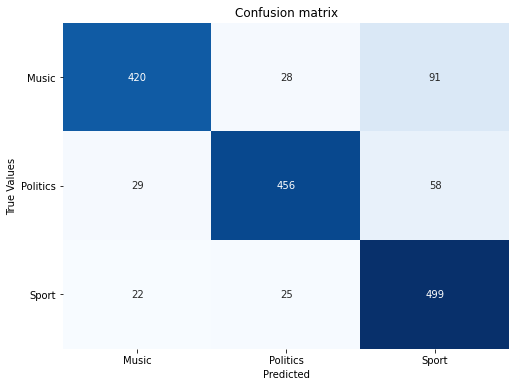

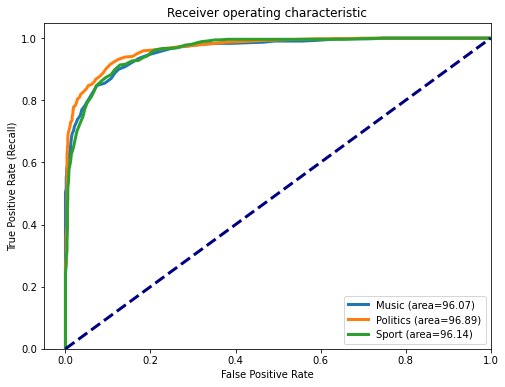

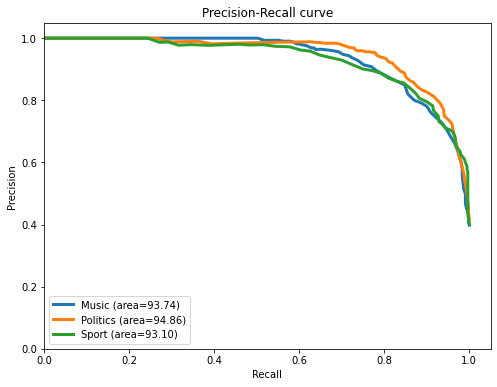

In [135]:
# Using RFC with char-ngram type count vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= CountVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("CV-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<h3> <font color='purple'> Using TF-IDF Vectorizer: </font> </h3>

Accuracy: 90.0
Auc: 99.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.82      0.89       539
    Politics       0.97      0.90      0.93       543
       Sport       0.80      0.97      0.87       546

    accuracy                           0.90      1628
   macro avg       0.91      0.90      0.90      1628
weighted avg       0.91      0.90      0.90      1628



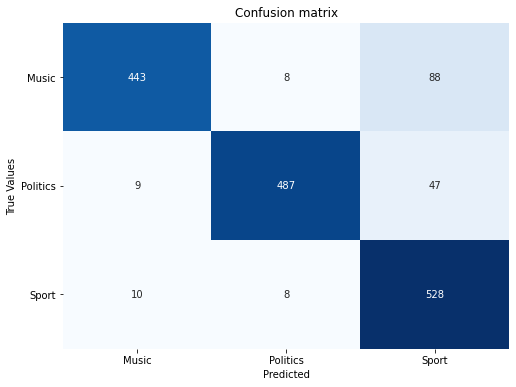

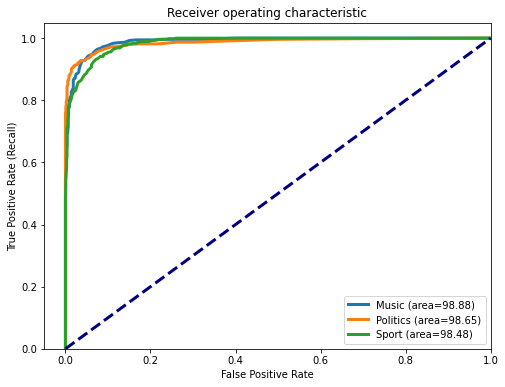

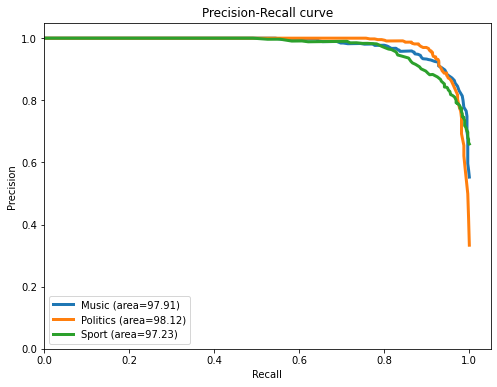

In [136]:
# Using RFC with word type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("TFIDF-word")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

Accuracy: 88.0
Auc: 98.0
Detail:
              precision    recall  f1-score   support

       Music       0.96      0.80      0.87       539
    Politics       0.97      0.88      0.92       543
       Sport       0.77      0.96      0.85       546

    accuracy                           0.88      1628
   macro avg       0.90      0.88      0.88      1628
weighted avg       0.90      0.88      0.88      1628



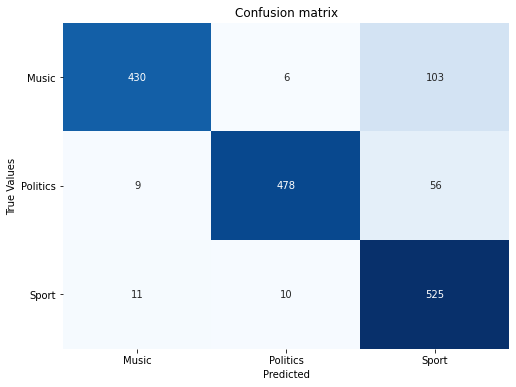

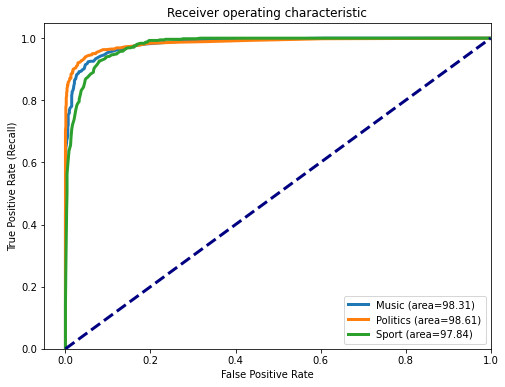

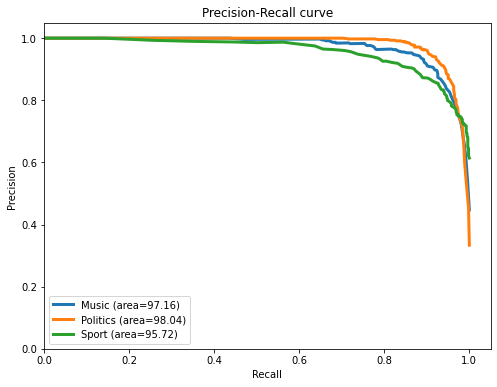

In [137]:
# Using RFC with word-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="word"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("TFIDF-word-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



Accuracy: 84.0
Auc: 96.0
Detail:
              precision    recall  f1-score   support

       Music       0.88      0.77      0.82       539
    Politics       0.91      0.85      0.88       543
       Sport       0.76      0.90      0.82       546

    accuracy                           0.84      1628
   macro avg       0.85      0.84      0.84      1628
weighted avg       0.85      0.84      0.84      1628



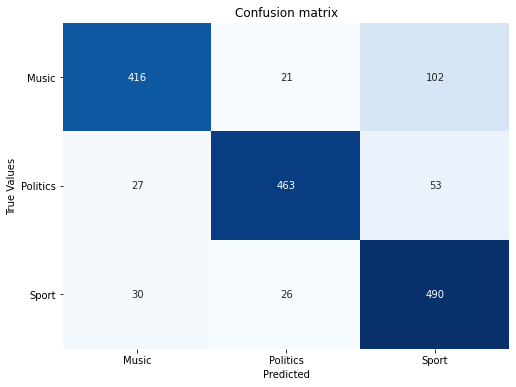

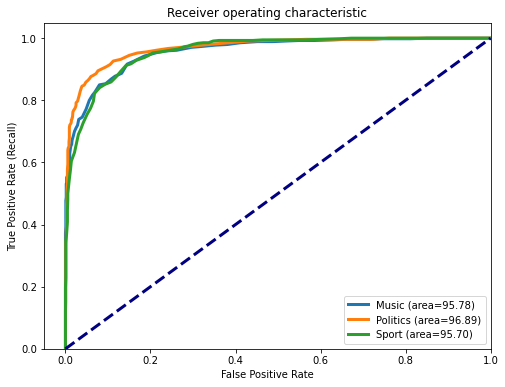

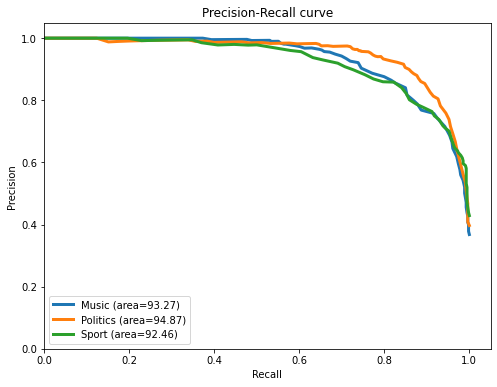

In [138]:
# Using RFC with char-ngram type tfidf vectorisation
acc, auc = text_classify(df_multi, classif="RF", 
                         vectorizer= TfidfVectorizer(stop_words=stop_words,
                                                     ngram_range=(1,3), 
                                                     max_features=10000,
                                                     analyzer="char"))

list_multi_models.append("Random Forest Classifier")
list_multi_vectorizers.append("TFIDF-char-ngram")
list_multi_Accuracy.append(acc)
list_multi_AUC_ROC.append(auc)

<center><h3> <font color='blue'> Comparing All the Models for Multi-Class Categories </font> </h3> </center>

In [139]:
# Creating final dataframe
final_scores_multi = pd.DataFrame(list_multi_models, columns = ['Models'])
final_scores_multi['Vectorizers'] = list_multi_vectorizers
final_scores_multi['Accuracy'] = list_multi_Accuracy
final_scores_multi['AUC_ROC_Score'] = list_multi_AUC_ROC
final_scores_multi = final_scores_multi.sort_values(by = 'Accuracy', ascending=False)

In [140]:
final_scores_multi.reset_index(inplace=True, drop='index')
final_scores_multi

Models       Vectorizers  Accuracy  AUC_ROC_Score
0    Multinomial Naive Bayes     CV-word-ngram  0.961916       0.995545
1    Multinomial Naive Bayes  TFIDF-word-ngram  0.958845       0.994877
2    Multinomial Naive Bayes           CV-word  0.958231       0.995289
3     Support Vector Machine  TFIDF-word-ngram  0.953931       0.995562
4     Support Vector Machine        TFIDF-word  0.949631       0.995406
5    Multinomial Naive Bayes        TFIDF-word  0.949017       0.994455
6     Support Vector Machine           CV-word  0.941646       0.992899
7     Support Vector Machine     CV-word-ngram  0.936732       0.992885
8    Multinomial Naive Bayes  TFIDF-char-ngram  0.902948       0.980029
9    Multinomial Naive Bayes     CV-char-ngram  0.899877       0.979804
10  Random Forest Classifier           CV-word  0.896192       0.985077
11    Support Vector Machine  TFIDF-char-ngram  0.895577       0.980162
12  Random Forest Classifier        TFIDF-word  0.895577       0.986727
13  Random Forest Classifier     CV-word-ngram  0.886978       0.983254
14  Random Forest Classifier  TFIDF-word-ngram  0.880221       0.982537
15    Support Vector Machine     CV-char-ngram  0.879607       0.975379
16  Random Forest Classifier     CV-char-ngram  0.844595       0.963666
17  Random Forest Classifier  TFIDF-char-ngram  0.840909       0.961234

In [141]:
fig = px.bar(final_scores_multi, x="Accuracy", color="Vectorizers",
             y='Models',
             barmode='group',
             height=600, text=round(final_scores_multi['Accuracy']* 100,2), orientation='h'
            )
fig.update_layout(title={'text': f"Comparison of Models based on Accuracy for Multi-Class Categories", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Accuracy", yaxis_title="Models")
fig.show()

<center><h3> <font color='blue'> Evaluation Discussions for Multi-Class Categories </font> </h3> </center>


<ul>
    <li><p style="text-align:justify;"><b> As we can see from the comparisons graph above for the Multi-Class Categories, the picture is evident enough to elaborate each and everything, even by hovering over it we can get a conspicuous understanding.</b></p></li>
    <li><p style="text-align:justify;"><b> After implementing each vectorizer-model combination, we see that the Multinomial Naive Bayes with Count Vectorizer word-ngram parameters has given the highest accuracy of 96.19% along with an ROC of 99.55%, which is outstanding for any classification algorithm.</b></p></li>
     <li><p style="text-align:justify;"><b> We can also see that the character-ngram vectorizers are having the lowest score among all the vectorizers used.</b></p></li>
    <li><p style="text-align:justify;"><b> Multinomial NB is showing nearly excellent results for all vectorisers, whereas the ensemble technique Random Forest Classifier has the weakest overall performance for all the vectorisers.</b></p></li>
    <li><p style="text-align:justify;"><b> We can thus infer that probability-based machine learning models could be best for the Multi-Class Categories, while we could refrain from using other ensemble techniques for this type of problem.</b></p></li>
</ul>

***

#### <center><h2> <font color='green'> Summary and Suggestions for future work</font> </h2> </center>

***

### <u style="color: darkblue;"> Summary: </u>

<ul>
    <li><p style="text-align:justify;"><b> For this comprehensive task, firstly I scraped the required news articles' names, titles and categories from the given <a href="http://mlg.ucd.ie/modules/COMP41680/assignment2/index.html">link</a>. For this, I went ahead with 3 categories - Sport, Music and Politics; and rather than scraping all the data off the website, I just scraped the required 3 categories completely (I cross-verified this) as seen in the <a href="#data_scraping">section</a> at the start. </b></p></li>
    <li><p style="text-align:justify;"><b> Then I saved the texts as lists and then as a dataframe, which was finally saved as a "final.csv" file.</b></p></li>
    <li><p style="text-align:justify;"><b> For the text preprocessing, I used multiple text preprocessing, canonicalization, and normalization techniques as discussed in the appropriate <a href="#text_pre_section">section</a>. Herein, I wrote a complete pipelined manner function to clean a particular text, it also consists of WordNetLemmatization &amp; Porter Stemming techniques.</b></p></li>
    <li><p style="text-align:justify;"><b> I also checked for common words, unique words, and word clouds pertaining to all the 3 categories and added the most common words present in all the 3 categories to a stop word list, further used in the parameter of vectorisation function.</b></p></li>
    <li><p style="text-align:justify;"><b> After this, I wrote a complete text training-testing-evaluation classification function which is called for every discrete given ML algorithm, vectorizer with its argument for all the 3 unique pairings of categories as well as the multi-class categories. This function is written in order to reduce code redundancy and offer code reusability &amp; reproducibility. I have also kept the random seeds as 0 whereever required to get reproducible results on each run of the notebook.</b></p></li>
    <li><p style="text-align:justify;"><b> I have already discussed the evaluation results after each comparison of models for each unique pair as well as the multi-class classifier. But one thing which is common with the categories which I have chosen is; the Multinomial Naive Bayes with the word-ngram Count Vectorizer has given the best combination of the model-vectorizer with best accuracy scores above 97% and auc score nearly 100%.</b></p></li>
    <li><p style="text-align:justify;"><b> Other things, like a low error rate of 5% is also evident from all the confusion matrices. These outstanding results are good to be true because of the balanced classes and a very small number of news articles. But we can obviously give credit to the out-of-the box text preprocessing techniques which I adhered to in this wholesome task.</b></p></li>
    <li><p style="text-align:justify;"><b> I also tried passing the whole uncleaned dataset to the model-vectoriser combo and got above 90% accuracy. Accuracy using stemming is less than what we see with lemmatization above. </b></p></li>
    <li><p style="text-align:justify;"><b> I wasn't expecting to a great performance on the multi-class categories, but Multinomial NB along with word-ngram Count Vectoriser gave a whopping accuracy of nearly 97%, which is really commendable. </b></p></li>
    <li><p style="text-align:justify;"><b> To conclude, I would confidently say that, with more news articles or categories we can get above 90% accuracy and less than 5% error rate using my text preprocessing and text classification and evaluation strategy. </b></p></li>
</ul>

### <u style="color: darkblue;"> Future Work: </u>

<ul>
    <li><p style="text-align:justify;"><b> Apart from the comprehensive text preprocessing, classification, and evaluation techniques which we saw, there are numerous other multi-advanced techniques which are possible in the field of Text Analytics.</b></p></li>
    <li><p style="text-align:justify;"><b> Firstly, we can separately apply preprocessing on each unique paired category as well as the multi-class category (dataframes) and then apply the text classification function to it.</b></p></li>
    <li><p style="text-align:justify;"><b> We can also use other vectorization techniques like normalized term frequency and TFIDF, Word2Vec as seen in the image below &amp; <a href="https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685"> here.</a> We can also use something called as <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html">Hashing vectorizer</a>, which is fast, requires low memory and is easily scalable, however we cannot calculate the idf in this technique which is the major reason why I didn't try it. But we can use it in some other domains of text works. </b></p></li>
    <li><p style="text-align:justify;"><b> I don't think I have left any text preprocessing technique, as my dataset was completely cleaned, but one can explore other stemmers like Lancaster and Snowball Stemmer. There are nealy 14-15 libraries to get the lemmas of the words in a text, from whihc I liked the spacy library, but for this task I wrote a function myself for the lemmatization purpose.</b></p></li>
    <li><p style="text-align:justify;"><b> For text cleaning, we can also use a python library, called as the <a href="https://texthero.org/">texthero </a>. As its name suggests, it has direct method called clean(dataframe_column), which cleans the whole series of texts available in the column including all the text preprocessing strategies, in difficult tasks where classification is the area of focus and not cleaning, texthero could be useful for quicker results.</b></p></li>
    <li><p style="text-align:justify;"><b> For text classification training/testing, we can also use other bagging, boosting, linear, probability-based and shallow neural-net, deep neural-net models. Pertaining to deep neural-nets - CNN, LSTM, RNN, RCNN, BERT are the most famous text classification algorithms. <a href= "https://iq.opengenus.org/binary-text-classification-bert/#:~:text=Binary%20text%20classification%20is%20supervised,our%20binary%20classifier%20on%20it.">But the basic or classical approach to solve this problem is with TF-IDf or Count vectorizer along with MultinomialBayes </a>, which is what I did and I got splendid results. But if we have a large dataset of nearly lakhs of records, then we can consider using deep learning models.</b></p></li>
    <li><p style="text-align:justify;"><b> We can also perform some advanced feature engineering techniques like Frequency distribution of Part of Speech Tags, Word Count of the documents, Character Count of the documents, Average Word Density of the documents, and so on as seen <a href="https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/" > here </a>.</b></p></li>
    <li><p style="text-align:justify;"><b> For training &amp; evaluation purposes, we can use Hyperparameter tuning, wherein we can perform RandomSearchCV or GridSearchCV for best params of the machine learning models used. Still, for the Multinomial NB which I used, I'm using the classifier with alpha value which is giving best accuracy. We can also apply cross validation techniques like leave one leave out, k-fold, stratified k-fold cross validation in place of traditional hold-out strategy.</b></p></li>
   
</ul>

<img src="https://miro.medium.com/max/2400/1*FAwUef0viFgvqmpTclGgrA.png" alt="TFIDF rules">


***

#### <center><h2> <font color='green'> Clusters of the categories </font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='black'> 
Herein, we will have a glance at the categories created by K-Means and PCA using the newly introduced <a href="https://texthero.org/">texthero</a> library.
    </font></b></h3>

In [142]:
df_cluster = df.copy()
df_cluster['tfidf_cluster'] = (
    df_cluster['news']
    .pipe(hero.clean)
    .pipe(hero.do_tfidf)
)

df_cluster['kmeans_labels'] = (
    df_cluster['tfidf_cluster']
    .pipe(hero.do_kmeans, n_clusters=3)
    .astype(str)
)

df_cluster['pca'] = df_cluster['tfidf_cluster'].pipe(hero.do_pca)

hero.scatterplot(df_cluster, 'pca', color='kmeans_labels', title="K-means News Clusters")

C:\ProgramData\Anaconda3\lib\site-packages\texthero\preprocessing.py:46: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anaconda3\lib\site-packages\texthero\preprocessing.py:81: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



***